# Imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.patches import FancyBboxPatch, Circle, Rectangle, Polygon, FancyArrowPatch
import numpy as np
import networkx as nx
from ipywidgets import interact, Dropdown
import re
from collections import OrderedDict
from openpyxl import load_workbook
from scipy.ndimage import gaussian_filter
from PIL import Image
from scipy.ndimage import gaussian_filter, rotate
import ipywidgets as widgets
from ipywidgets import VBox, HBox, interactive_output
import matplotlib.colors as mcolors

# FAMILIES INFORMATION

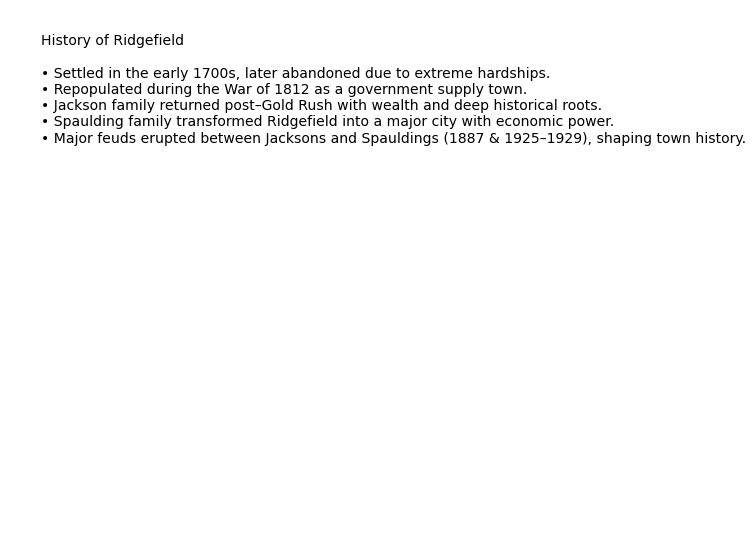

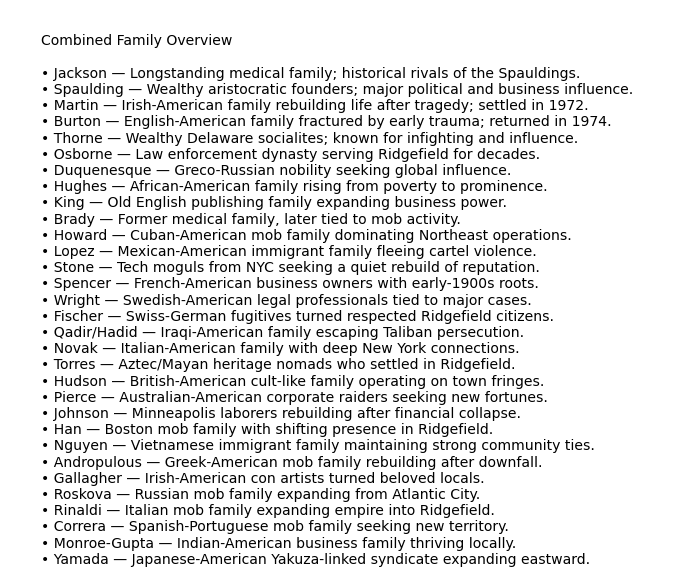

In [5]:
def show_text_slide(title, bullet_points):
    fig, ax = plt.subplots(figsize=(12,10))
    ax.axis("off")
    formatted = title + "\n\n" + "\n".join("• " + bp for bp in bullet_points)
    ax.text(0.05, 0.95, formatted, ha="left", va="top", wrap=True, fontsize=14)
    plt.show()

history_summary = [
    "Settled in the early 1700s, later abandoned due to extreme hardships.",
    "Repopulated during the War of 1812 as a government supply town.",
    "Jackson family returned post–Gold Rush with wealth and deep historical roots.",
    "Spaulding family transformed Ridgefield into a major city with economic power.",
    "Major feuds erupted between Jacksons and Spauldings (1887 & 1925–1929), shaping town history."
]

families_summary = [
    "Jackson — Longstanding medical family; historical rivals of the Spauldings.",
    "Spaulding — Wealthy aristocratic founders; major political and business influence.",
    "Martin — Irish-American family rebuilding life after tragedy; settled in 1972.",
    "Burton — English-American family fractured by early trauma; returned in 1974.",
    "Thorne — Wealthy Delaware socialites; known for infighting and influence.",
    "Osborne — Law enforcement dynasty serving Ridgefield for decades.",
    "Duquenesque — Greco-Russian nobility seeking global influence.",
    "Hughes — African-American family rising from poverty to prominence.",
    "King — Old English publishing family expanding business power.",
    "Brady — Former medical family, later tied to mob activity.",
    "Howard — Cuban-American mob family dominating Northeast operations.",
    "Lopez — Mexican-American immigrant family fleeing cartel violence.",
    "Stone — Tech moguls from NYC seeking a quiet rebuild of reputation.",
    "Spencer — French-American business owners with early-1900s roots.",
    "Wright — Swedish-American legal professionals tied to major cases.",
    "Fischer — Swiss-German fugitives turned respected Ridgefield citizens.",
    "Qadir/Hadid — Iraqi-American family escaping Taliban persecution.",
    "Novak — Italian-American family with deep New York connections.",
    "Torres — Aztec/Mayan heritage nomads who settled in Ridgefield.",
    "Hudson — British-American cult-like family operating on town fringes.",
    "Pierce — Australian-American corporate raiders seeking new fortunes.",
    "Johnson — Minneapolis laborers rebuilding after financial collapse.",
    "Han — Boston mob family with shifting presence in Ridgefield.",
    "Nguyen — Vietnamese immigrant family maintaining strong community ties.",
    "Andropulous — Greek-American mob family rebuilding after downfall.",
    "Gallagher — Irish-American con artists turned beloved locals.",
    "Roskova — Russian mob family expanding from Atlantic City.",
    "Rinaldi — Italian mob family expanding empire into Ridgefield.",
    "Correra — Spanish-Portuguese mob family seeking new territory.",
    "Monroe-Gupta — Indian-American business family thriving locally.",
    "Yamada — Japanese-American Yakuza-linked syndicate expanding eastward."
]

def ridgefield_history_and_families():
    show_text_slide("History of Ridgefield", history_summary)
    show_text_slide("Combined Family Overview", families_summary)


ridgefield_history_and_families()

# BINDING TIES SHOW INFORMATION

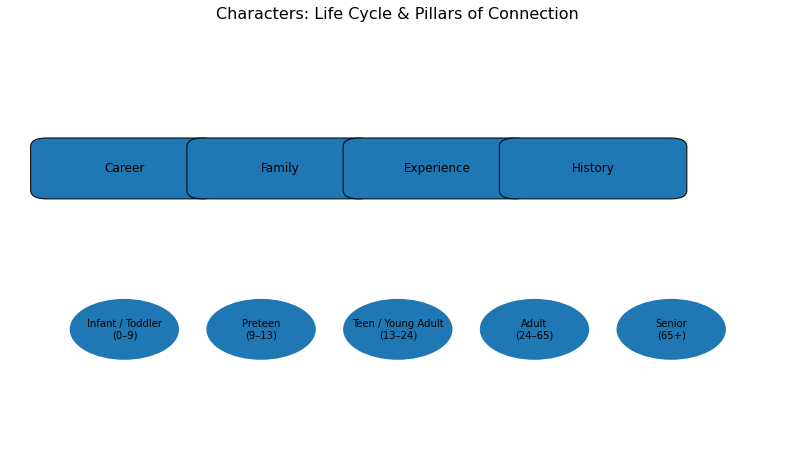

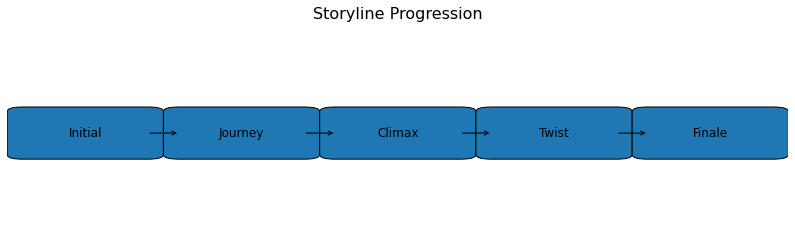

In [12]:
def pillarsandlifecycle():
    fig, ax = plt.subplots(figsize=(14,8))
    ax.axis("off")
    pillars = [
        "Career",
        "Family",
        "Experience",
        "History"
    ]
    x_pos = [0.15, 0.35, 0.55, 0.75]
    for x, label in zip(x_pos, pillars):
        box = FancyBboxPatch((x-0.1, 0.62), 0.2, 0.1,
                              boxstyle="round,pad=0.02")
        ax.add_patch(box)
        ax.text(x, 0.67, label, ha="center", va="center", fontsize=12)
    stages = [
        "Infant / Toddler\n(0–9)",
        "Preteen\n(9–13)",
        "Teen / Young Adult\n(13–24)",
        "Adult\n(24–65)",
        "Senior\n(65+)"
    ]
    for i, s in enumerate(stages):
        c = Circle((0.15 + i*0.175, 0.3), 0.07)
        ax.add_patch(c)
        ax.text(0.15 + i*0.175, 0.3, s,
                ha="center", va="center", fontsize=10)
    ax.set_title("Characters: Life Cycle & Pillars of Connection", fontsize=16)
    plt.show()
    
def storyprogression():
    fig, ax = plt.subplots(figsize=(14,4))
    ax.axis("off")
    stages = ["Initial", "Journey", "Climax", "Twist", "Finale"]
    xs = [0.1, 0.3, 0.5, 0.7, 0.9]
    for i, (x, s) in enumerate(zip(xs, stages)):
        box = FancyBboxPatch(
            (x-0.08, 0.4), 0.16, 0.2,
            boxstyle="round,pad=0.02"
        )
        ax.add_patch(box)
        ax.text(x, 0.5, s, ha="center", va="center", fontsize=12)
        if i < len(xs)-1:
            ax.annotate("", xy=(xs[i+1]-0.08, 0.5),
                        xytext=(x+0.08, 0.5),
                        arrowprops=dict(arrowstyle="->"))
    ax.set_title("Storyline Progression", fontsize=16)
    plt.show()

pillarsandlifecycle()
storyprogression()

In [8]:
def development():
    fig, ax = plt.subplots(figsize=(8,8))
    ax.axis("off")
    center = (0.5, 0.5)
    ax.text(*center, "Character\nDevelopment",
            ha="center", va="center", fontsize=12)
    domains = [
        "Career", "Family", "Relationships", "Personality",
        "Trauma", "Strengths", "Weaknesses", "Past"
    ]
    angles = np.linspace(0, 2*np.pi, len(domains), endpoint=False)
    for a, d in zip(angles, domains):
        x = center[0] + 0.35*np.cos(a)
        y = center[1] + 0.35*np.sin(a)
        ax.plot([center[0], x], [center[1], y])
        ax.text(x, y, d, ha="center", va="center", fontsize=10)
    ax.set_title("Character Development Domains", fontsize=16)
    plt.show()

development()

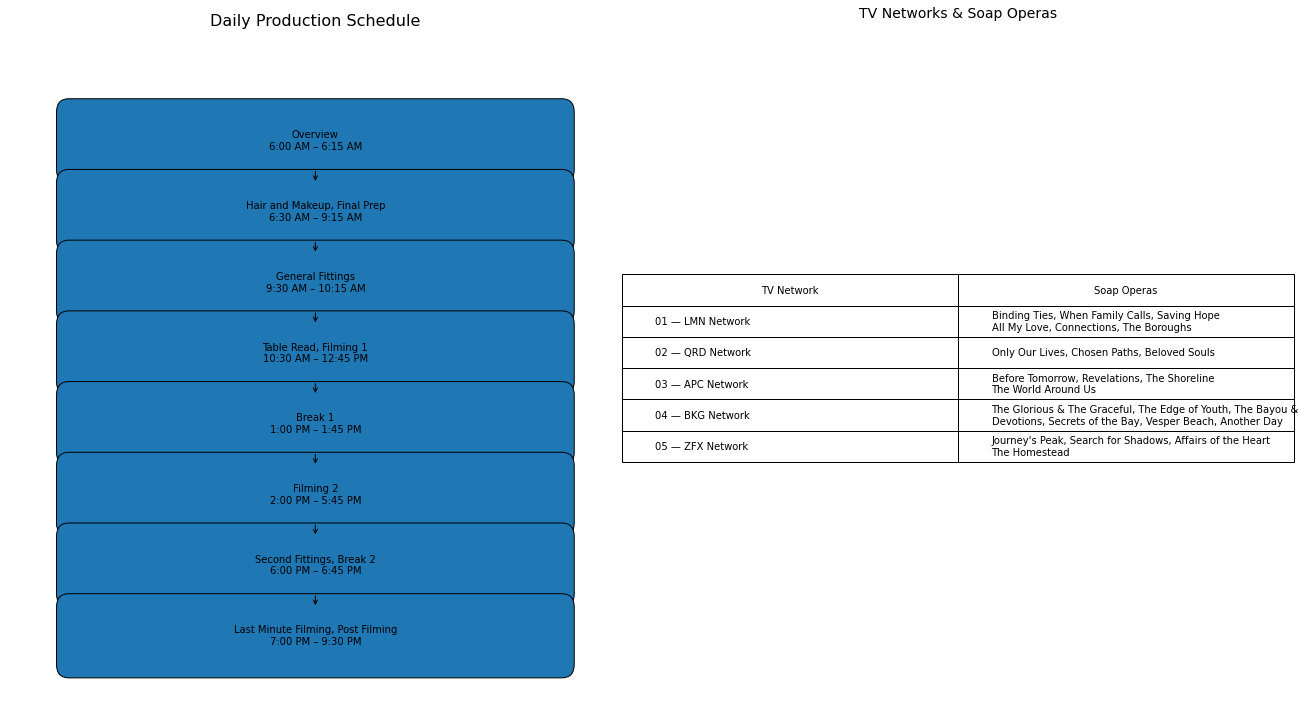

In [19]:
def production_schedule():
    fig = plt.figure(figsize=(18, 10))
    gs = fig.add_gridspec(1, 2, width_ratios=[1.1, 1.0])
    ax = fig.add_subplot(gs[0])
    ax.axis("off")
    schedule = [
        ("Overview", "6:00 AM – 6:15 AM"),
        ("Hair and Makeup, Final Prep", "6:30 AM – 9:15 AM"),
        ("General Fittings", "9:30 AM – 10:15 AM"),
        ("Table Read, Filming 1", "10:30 AM – 12:45 PM"),
        ("Break 1", "1:00 PM – 1:45 PM"),
        ("Filming 2", "2:00 PM – 5:45 PM"),
        ("Second Fittings, Break 2", "6:00 PM – 6:45 PM"),
        ("Last Minute Filming, Post Filming", "7:00 PM – 9:30 PM"),
    ]
    ys = list(reversed([0.06 + i * 0.105 for i in range(len(schedule))]))
    for i, ((label, time), y) in enumerate(zip(schedule, ys)):
        box = FancyBboxPatch(
            (0.1, y), 0.8, 0.085,
            boxstyle="round,pad=0.02"
        )
        ax.add_patch(box)
        ax.text(
            0.5, y + 0.043,
            f"{label}\n{time}",
            ha="center", va="center", fontsize=10
        )
        if i < len(ys) - 1:
            ax.annotate(
                "",
                xy=(0.5, ys[i + 1] + 0.085),
                xytext=(0.5, y),
                arrowprops=dict(arrowstyle="->")
            )
    ax.set_title("Daily Production Schedule", fontsize=16)
    ax_tbl = fig.add_subplot(gs[1])
    ax_tbl.axis("off")
    table_data = [
        ["01 — LMN Network",
         "Binding Ties, When Family Calls, Saving Hope\nAll My Love, Connections, The Boroughs"],
        ["02 — QRD Network",
         "Only Our Lives, Chosen Paths, Beloved Souls"],
        ["03 — APC Network",
         "Before Tomorrow, Revelations, The Shoreline\nThe World Around Us"],
        ["04 — BKG Network",
         "The Glorious & The Graceful, The Edge of Youth, The Bayou & Beyond\nDevotions, Secrets of the Bay, Vesper Beach, Another Day"],
        ["05 — ZFX Network",
         "Journey's Peak, Search for Shadows, Affairs of the Heart\nThe Homestead"],
    ]
    table = ax_tbl.table(
        cellText=table_data,
        colLabels=["TV Network", "Soap Operas"],
        cellLoc="left",
        loc="center"
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 2.1)

    ax_tbl.set_title("TV Networks & Soap Operas", fontsize=14, pad=14)

    plt.tight_layout()
    plt.show()


production_schedule()

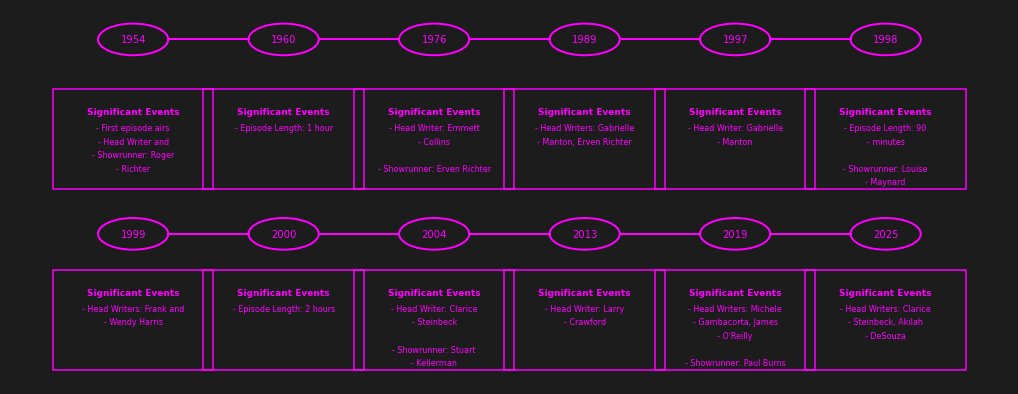

In [25]:
def timeline():
    fig, ax = plt.subplots(figsize=(18, 7))
    ax.set_facecolor("#1c1c1c")
    fig.patch.set_facecolor("#1c1c1c")
    ax.axis("off")
    magenta = "#ff00ff"
    text_color = magenta
    top_row = [
        ("1954", [
            "First episode airs",
            "Head Writer and",
            "Showrunner: Roger",
            "Richter"
        ]),
        ("1960", [
            "Episode Length: 1 hour"
        ]),
        ("1976", [
            "Head Writer: Emmett",
            "Collins",
            "",
            "Showrunner: Erven Richter"
        ]),
        ("1989", [
            "Head Writers: Gabrielle",
            "Manton, Erven Richter"
        ]),
        ("1997", [
            "Head Writer: Gabrielle",
            "Manton"
        ]),
        ("1998", [
            "Episode Length: 90",
            "minutes",
            "",
            "Showrunner: Louise",
            "Maynard"
        ]),
    ]

    bottom_row = [
        ("1999", [
            "Head Writers: Frank and",
            "Wendy Harris"
        ]),
        ("2000", [
            "Episode Length: 2 hours"
        ]),
        ("2004", [
            "Head Writer: Clarice",
            "Steinbeck",
            "",
            "Showrunner: Stuart",
            "Kellerman"
        ]),
        ("2013", [
            "Head Writer: Larry",
            "Crawford"
        ]),
        ("2019", [
            "Head Writers: Michele",
            "Gambacorta, James",
            "O'Reilly",
            "",
            "Showrunner: Paul Burns"
        ]),
        ("2025", [
            "Head Writers: Clarice",
            "Steinbeck, Akilah",
            "DeSouza"
        ]),
    ]
    x_top = [0.05 + i * 0.15 for i in range(len(top_row))]
    x_bot = [0.05 + i * 0.15 for i in range(len(bottom_row))]
    y_circle_top = 0.78
    y_box_top = 0.45
    y_circle_bot = 0.35
    y_box_bot = 0.05
    circle_r = 0.035
    box_w = 0.16
    box_h = 0.22
    def draw_circle(x, y, label):
        circ = Circle((x, y), circle_r, fill=False, ec=magenta, lw=2)
        ax.add_patch(circ)
        ax.text(x, y, label, color=text_color,
                ha="center", va="center", fontsize=10)

    def draw_box(x, y, lines):
        rect = Rectangle((x - box_w/2, y),
                         box_w, box_h,
                         fill=False, ec=magenta, lw=1.5)
        ax.add_patch(rect)
        ax.text(x, y + box_h - 0.04,
                "Significant Events",
                color=text_color, ha="center",
                va="top", fontsize=9, weight="bold")

        for i, line in enumerate(lines):
            ax.text(x, y + box_h - 0.075 - i * 0.03,
                    f"- {line}" if line else "",
                    color=text_color,
                    ha="center", va="top", fontsize=8)

    def draw_connector(x1, x2, y):
        ax.plot([x1 + circle_r, x2 - circle_r],
                [y, y], color=magenta, lw=2)
    for i, ((year, lines), x) in enumerate(zip(top_row, x_top)):
        draw_circle(x, y_circle_top, year)
        draw_box(x, y_box_top, lines)
        if i < len(x_top) - 1:
            draw_connector(x, x_top[i+1], y_circle_top)
    for i, ((year, lines), x) in enumerate(zip(bottom_row, x_bot)):
        draw_circle(x, y_circle_bot, year)
        draw_box(x, y_box_bot, lines)
        if i < len(x_bot) - 1:
            draw_connector(x, x_bot[i+1], y_circle_bot)
            
timeline()

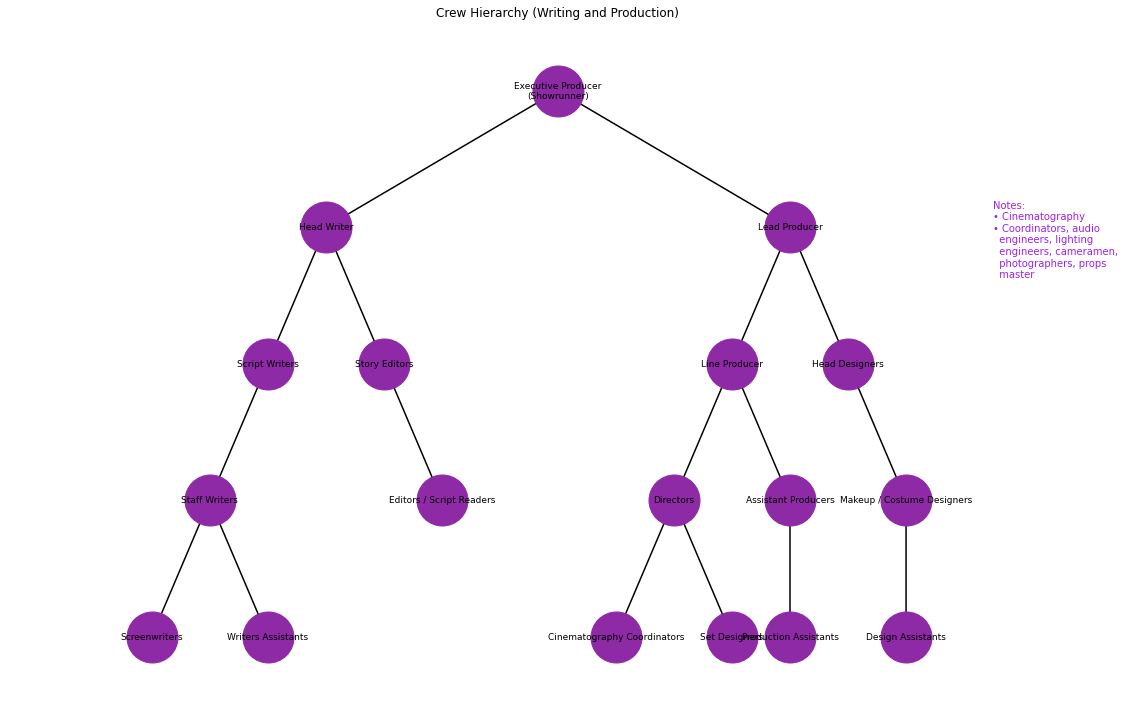

In [54]:
G = nx.DiGraph()

nodes = [
    "Executive Producer\n(Showrunner)",

    "Head Writer", "Lead Producer",

    "Script Writers", "Story Editors",
    "Line Producer", "Head Designers",

    "Staff Writers", "Editors / Script Readers",
    "Directors", "Assistant Producers",
    "Makeup / Costume Designers",

    "Screenwriters", "Writers Assistants",
    "Cinematography Coordinators", "Set Designers",
    "Production Assistants", "Design Assistants"
]
edges = [
    ("Executive Producer\n(Showrunner)", "Head Writer"),
    ("Executive Producer\n(Showrunner)", "Lead Producer"),
    ("Head Writer", "Script Writers"),
    ("Head Writer", "Story Editors"),
    ("Script Writers", "Staff Writers"),
    ("Story Editors", "Editors / Script Readers"),
    ("Staff Writers", "Screenwriters"),
    ("Staff Writers", "Writers Assistants"),
    ("Lead Producer", "Line Producer"),
    ("Lead Producer", "Head Designers"),
    ("Line Producer", "Directors"),
    ("Line Producer", "Assistant Producers"),
    ("Directors", "Cinematography Coordinators"),
    ("Directors", "Set Designers"),
    ("Assistant Producers", "Production Assistants"),
    ("Head Designers", "Makeup / Costume Designers"),
    ("Makeup / Costume Designers", "Design Assistants")
]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

pos = {
    "Executive Producer\n(Showrunner)": (0, 5),
    "Head Writer": (-4, 4),
    "Lead Producer": (4, 4),
    "Script Writers": (-5, 3),
    "Story Editors": (-3, 3),
    "Line Producer": (3, 3),
    "Head Designers": (5, 3),
    "Staff Writers": (-6, 2),
    "Editors / Script Readers": (-2, 2),
    "Directors": (2, 2),
    "Assistant Producers": (4, 2),
    "Makeup / Costume Designers": (6, 2),
    "Screenwriters": (-7, 1),
    "Writers Assistants": (-5, 1),
    "Cinematography Coordinators": (1, 1),
    "Set Designers": (3, 1),
    "Production Assistants": (4, 1),
    "Design Assistants": (6, 1)
}

fig, ax = plt.subplots(figsize=(16, 10))
ax.set_facecolor("#1e1e1e")
nx.draw_networkx_edges(
    G, pos,
    edge_color="black",
    width=1.5,
    ax=ax
)
nx.draw_networkx_labels(
    G, pos,
    font_size=9,
    font_color="black",
    ax=ax
)
nx.draw_networkx_nodes(
    G, pos,
    node_color="#8e2aa5",
    node_size=2600,
    node_shape="o",
    ax=ax
)
ax.text(
    -8.2, 3.7,
    "Writing and Production\nCrew Hierarchy",
    fontsize=18,
    color="white",
    rotation=55,
    ha="center",
    va="center"
)
notes = (
    "Notes:\n"
    "• Cinematography\n"
    "• Coordinators, audio\n"
    "  engineers, lighting\n"
    "  engineers, cameramen,\n"
    "  photographers, props\n"
    "  master"
)
ax.text(
    7.5, 4.2,
    notes,
    fontsize=10,
    color="#a020f0",
    ha="left",
    va="top"
)
ax.set_xlim(-9, 9)
ax.set_ylim(0.5, 5.5)
ax.axis("off")
plt.title("Crew Hierarchy (Writing and Production)")
plt.tight_layout()
plt.show()

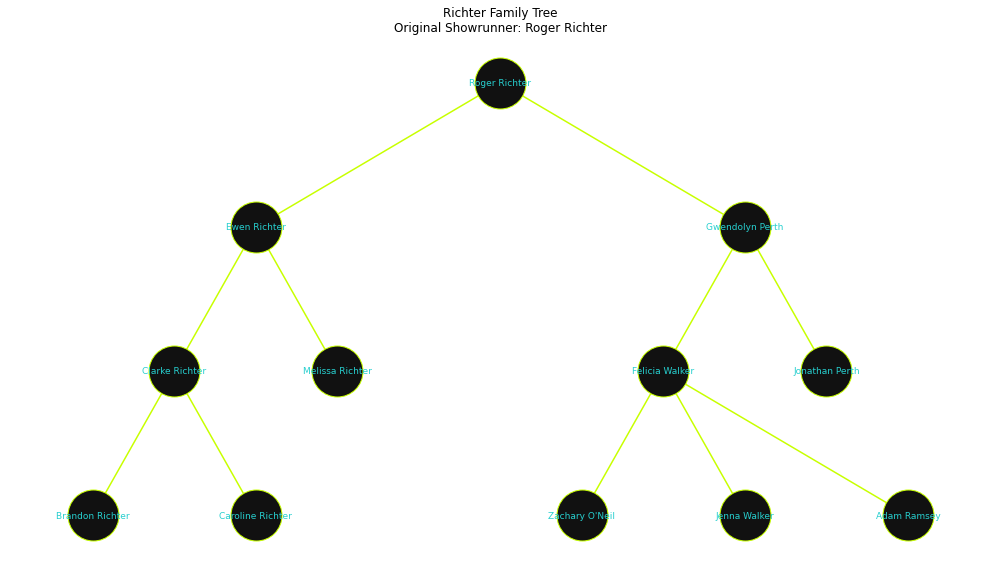

In [56]:
G = nx.DiGraph()

nodes = [
    "Roger Richter",
    "Ewen Richter", "Gwendolyn Perth",
    "Clarke Richter", "Melissa Richter",
    "Felicia Walker", "Jonathan Perth",
    "Brandon Richter", "Caroline Richter",
    "Zachary O'Neil", "Jenna Walker", "Adam Ramsey"
]
edges = [
    ("Roger Richter","Ewen Richter"),
    ("Roger Richter","Gwendolyn Perth"),
    ("Ewen Richter","Clarke Richter"),
    ("Ewen Richter","Melissa Richter"),
    ("Clarke Richter","Brandon Richter"),
    ("Clarke Richter","Caroline Richter"),
    ("Gwendolyn Perth","Felicia Walker"),
    ("Gwendolyn Perth","Jonathan Perth"),
    ("Felicia Walker","Zachary O'Neil"),
    ("Felicia Walker","Jenna Walker"),
    ("Felicia Walker","Adam Ramsey")
]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

pos = {
    "Roger Richter": (0,5),
    "Ewen Richter": (-3,4),
    "Gwendolyn Perth": (3,4),
    "Clarke Richter": (-4,3),
    "Melissa Richter": (-2,3),
    "Felicia Walker": (2,3),
    "Jonathan Perth": (4,3),
    "Brandon Richter": (-5,2),
    "Caroline Richter": (-3,2),
    "Zachary O'Neil": (1,2),
    "Jenna Walker": (3,2),
    "Adam Ramsey": (5,2)
}

fig, ax = plt.subplots(figsize=(14,8))
ax.set_facecolor("#1e1e1e")
nx.draw_networkx_edges(G, pos, edge_color="#c8ff00", width=1.5, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=9, font_color="#27cfcf", ax=ax)
nx.draw_networkx_nodes(
    G, pos,
    node_color="#111111",
    node_size=2600,
    node_shape="o",
    edgecolors="#c8ff00",
    ax=ax
)
ax.axis("off")
plt.title("Richter Family Tree\nOriginal Showrunner: Roger Richter")
plt.tight_layout()
plt.show()

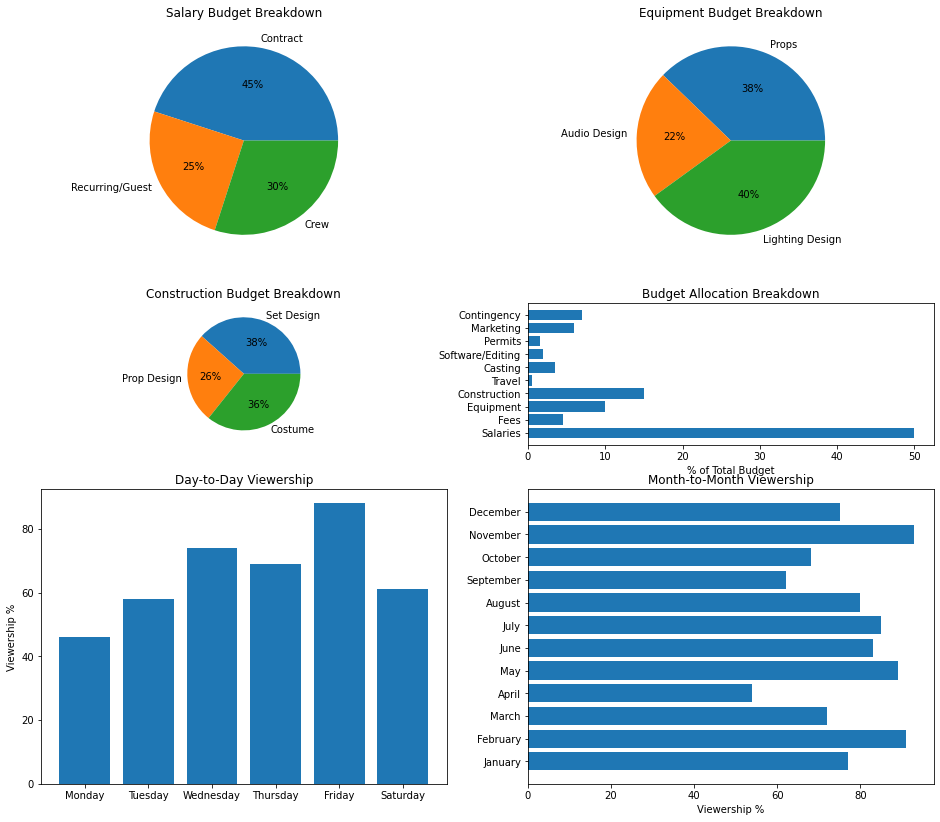

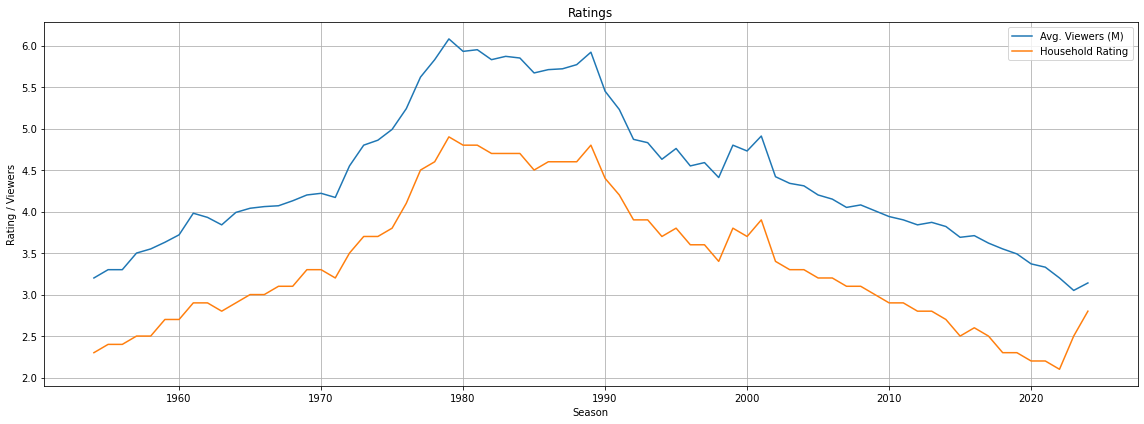

In [59]:
salary_labels = ["Contract", "Recurring/Guest", "Crew"]
salary_vals = [45, 25, 30]
equipment_labels = ["Props", "Audio Design", "Lighting Design"]
equipment_vals = [17, 10, 18]
construction_labels = ["Set Design", "Prop Design", "Costume"]
construction_vals = [43, 29, 40]
budget_vars = [
    "Salaries", "Fees", "Equipment", "Construction",
    "Travel", "Casting", "Software/Editing",
    "Permits", "Marketing", "Contingency"
]
budget_vals = [50, 4.5, 10, 15, 0.5, 3.5, 2, 1.5, 6, 7]
days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
day_vals = [46, 58, 74, 69, 88, 61]

months = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]
month_vals = [77, 91, 72, 54, 89, 83, 85, 80, 62, 68, 93, 75]
seasons = np.arange(1954, 2025)
avg_viewers = [
    3.2,3.3,3.3,3.5,3.55,3.63,3.72,3.98,3.93,3.84,
    3.99,4.04,4.06,4.07,4.13,4.20,4.22,4.17,4.55,4.80,
    4.86,4.99,5.24,5.62,5.83,6.08,5.93,5.95,5.83,5.87,
    5.85,5.67,5.71,5.72,5.77,5.92,5.45,5.23,4.87,4.83,
    4.63,4.76,4.55,4.59,4.41,4.80,4.73,4.91,4.42,4.34,
    4.31,4.20,4.15,4.05,4.08,4.01,3.94,3.90,3.84,3.87,
    3.82,3.69,3.71,3.62,3.55,3.49,3.37,3.33,3.20,3.05,3.14
]
household_rating = [
    2.3,2.4,2.4,2.5,2.5,2.7,2.7,2.9,2.9,2.8,
    2.9,3.0,3.0,3.1,3.1,3.3,3.3,3.2,3.5,3.7,
    3.7,3.8,4.1,4.5,4.6,4.9,4.8,4.8,4.7,4.7,
    4.7,4.5,4.6,4.6,4.6,4.8,4.4,4.2,3.9,3.9,
    3.7,3.8,3.6,3.6,3.4,3.8,3.7,3.9,3.4,3.3,
    3.3,3.2,3.2,3.1,3.1,3.0,2.9,2.9,2.8,2.8,
    2.7,2.5,2.6,2.5,2.3,2.3,2.2,2.2,2.1,2.5,2.8
]

fig = plt.figure(figsize=(16, 14))
gs = fig.add_gridspec(3, 2, height_ratios=[2, 1.2, 2.5])
ax1 = fig.add_subplot(gs[0, 0])
ax1.pie(salary_vals, labels=salary_labels, autopct="%1.0f%%")
ax1.set_title("Salary Budget Breakdown")
ax2 = fig.add_subplot(gs[0, 1])
ax2.pie(equipment_vals, labels=equipment_labels, autopct="%1.0f%%")
ax2.set_title("Equipment Budget Breakdown")
ax3 = fig.add_subplot(gs[1, 0])
ax3.pie(construction_vals, labels=construction_labels, autopct="%1.0f%%")
ax3.set_title("Construction Budget Breakdown")
ax4 = fig.add_subplot(gs[1, 1])
ax4.barh(budget_vars, budget_vals)
ax4.set_title("Budget Allocation Breakdown")
ax4.set_xlabel("% of Total Budget")
ax5 = fig.add_subplot(gs[2, 0])
ax5.bar(days, day_vals)
ax5.set_title("Day-to-Day Viewership")
ax5.set_ylabel("Viewership %")
ax6 = fig.add_subplot(gs[2, 1])
ax6.barh(months, month_vals)
ax6.set_title("Month-to-Month Viewership")
ax6.set_xlabel("Viewership %")
fig2, ax7 = plt.subplots(figsize=(16, 6))
ax7.plot(seasons, avg_viewers, label="Avg. Viewers (M)")
ax7.plot(seasons, household_rating, label="Household Rating")
ax7.set_title("Ratings")
ax7.set_xlabel("Season")
ax7.set_ylabel("Rating / Viewers")
ax7.legend()
ax7.grid(True)
plt.tight_layout()
plt.show()

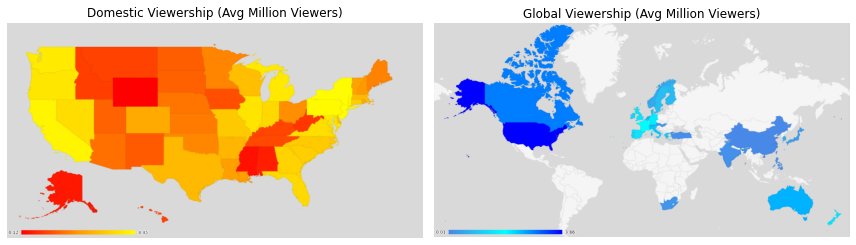

In [96]:
img_path_1 = r"C:\Users\zplew\Downloads\USViewersMap.png"
img_path_2 = r"C:\Users\zplew\Downloads\WorldViewersMap.png"
img1 = mpimg.imread(img_path_1)
img2 = mpimg.imread(img_path_2)
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(12, 6)
)
axes[0].imshow(img1)
axes[0].axis("off")
axes[0].set_title("Domestic Viewership (Avg Million Viewers)")
axes[1].imshow(img2)
axes[1].axis("off")
axes[1].set_title("Global Viewership (Avg Million Viewers)")
plt.tight_layout()
plt.show()

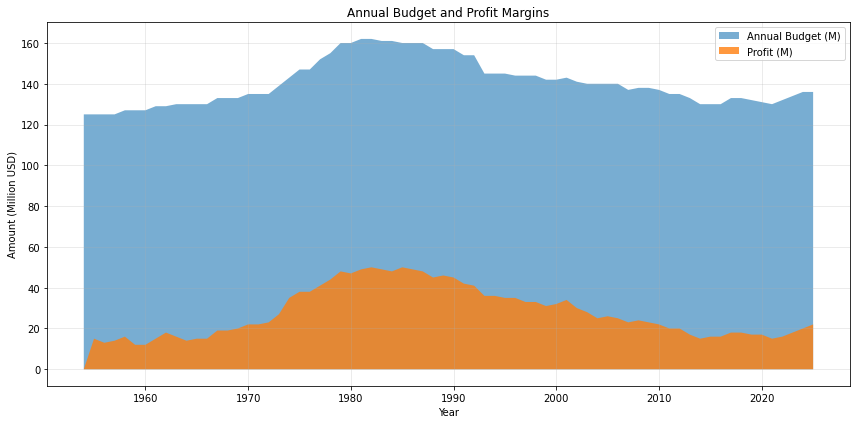

In [85]:
years = list(range(1954, 2026))

budget_millions = [
    125,125,125,125,127,127,127,129,129,130,130,130,130,133,133,133,
    135,135,135,139,143,147,147,152,155,160,160,162,162,161,161,160,
    160,160,157,157,157,154,154,145,145,145,144,144,144,142,142,143,
    141,140,140,140,140,137,138,138,137,135,135,133,130,130,130,133,
    133,132,131,130,132,134,136,136
]

profit_millions = [
     0,15,13,14,16,12,12,15,18,16,14,15,15,19,19,20,
    22,22,23,27,35,38,38,41,44,48,47,49,50,49,48,50,
    49,48,45,46,45,42,41,36,36,35,35,33,33,31,32,34,
    30,28,25,26,25,23,24,23,22,20,20,17,15,16,16,18,
    18,17,17,15,16,18,20,22
]

plt.figure(figsize=(12, 6))
plt.fill_between(
    years,
    budget_millions,
    label="Annual Budget (M)",
    alpha=0.6
)
plt.fill_between(
    years,
    profit_millions,
    label="Profit (M)",
    alpha=0.8
)
plt.title("Annual Budget and Profit Margins")
plt.xlabel("Year")
plt.ylabel("Amount (Million USD)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'All Soap Operas: Ratings')

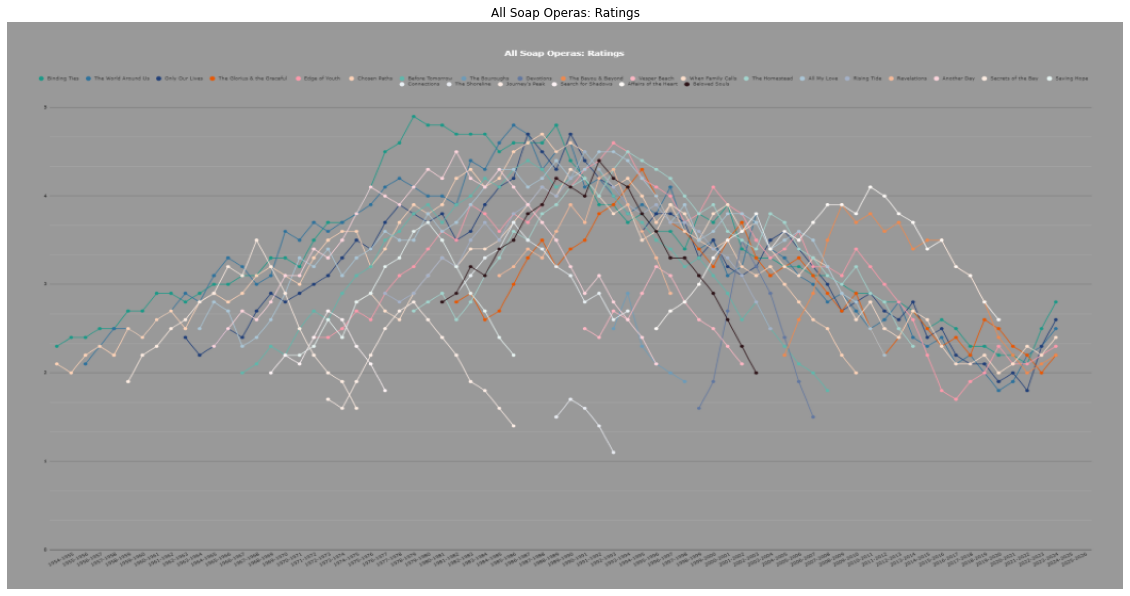

In [84]:
img_path_1 = r"C:\Users\zplew\Downloads\All Ratings.png"
img1 = mpimg.imread(img_path_1)
plt.figure(figsize=(20,16))
plt.imshow(img1)
plt.axis("off")
plt.title("All Soap Operas: Ratings")

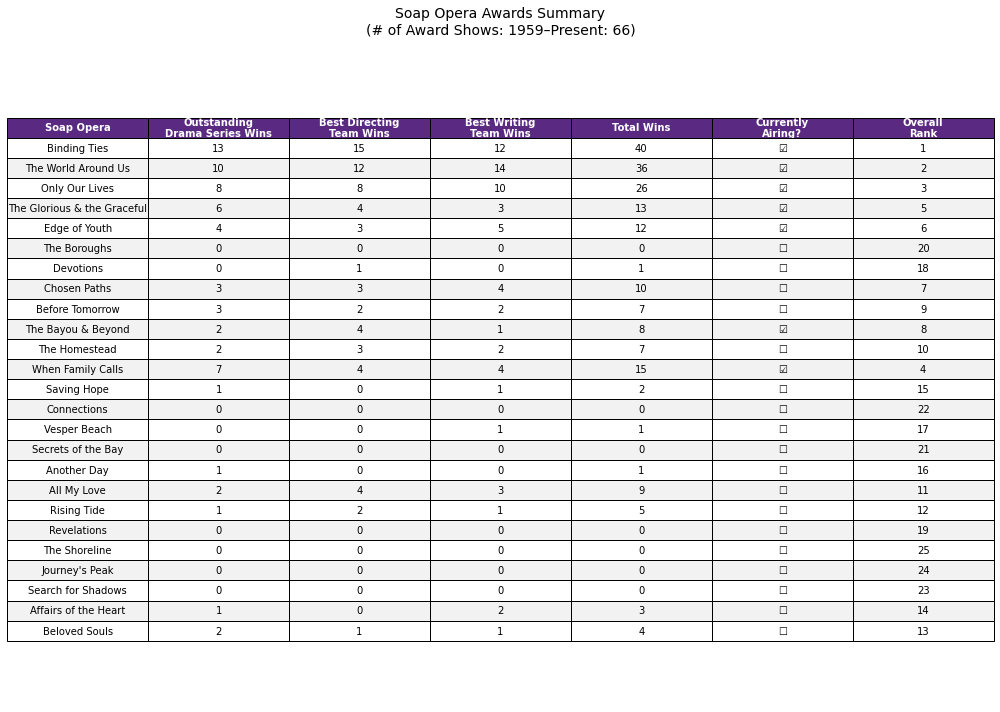

In [102]:
rows = [
    ("Binding Ties", 13, 15, 12, 40, True, 1),
    ("The World Around Us", 10, 12, 14, 36, True, 2),
    ("Only Our Lives", 8, 8, 10, 26, True, 3),
    ("The Glorious & the Graceful", 6, 4, 3, 13, True, 5),
    ("Edge of Youth", 4, 3, 5, 12, True, 6),
    ("The Boroughs", 0, 0, 0, 0, False, 20),
    ("Devotions", 0, 1, 0, 1, False, 18),
    ("Chosen Paths", 3, 3, 4, 10, False, 7),
    ("Before Tomorrow", 3, 2, 2, 7, False, 9),
    ("The Bayou & Beyond", 2, 4, 1, 8, True, 8),
    ("The Homestead", 2, 3, 2, 7, False, 10),
    ("When Family Calls", 7, 4, 4, 15, True, 4),
    ("Saving Hope", 1, 0, 1, 2, False, 15),
    ("Connections", 0, 0, 0, 0, False, 22),
    ("Vesper Beach", 0, 0, 1, 1, False, 17),
    ("Secrets of the Bay", 0, 0, 0, 0, False, 21),
    ("Another Day", 1, 0, 0, 1, False, 16),
    ("All My Love", 2, 4, 3, 9, False, 11),
    ("Rising Tide", 1, 2, 1, 5, False, 12),
    ("Revelations", 0, 0, 0, 0, False, 19),
    ("The Shoreline", 0, 0, 0, 0, False, 25),
    ("Journey's Peak", 0, 0, 0, 0, False, 24),
    ("Search for Shadows", 0, 0, 0, 0, False, 23),
    ("Affairs of the Heart", 1, 0, 2, 3, False, 14),
    ("Beloved Souls", 2, 1, 1, 4, False, 13),
]
headers = [
    "Soap Opera",
    "Outstanding\nDrama Series Wins",
    "Best Directing\nTeam Wins",
    "Best Writing\nTeam Wins",
    "Total Wins",
    "Currently\nAiring?",
    "Overall\nRank"
]

table_data = []
for r in rows:
    check = "☑" if r[5] else "☐"
    table_data.append([r[0], r[1], r[2], r[3], r[4], check, r[6]])
fig, ax = plt.subplots(figsize=(14, 10))
ax.axis("off")
tbl = ax.table(
    cellText=table_data,
    colLabels=headers,
    loc="center",
    cellLoc="center"
)
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1, 1.4)
for (row, col), cell in tbl.get_celld().items():
    if row == 0:
        cell.set_facecolor("#5a2a82")   # Header purple
        cell.set_text_props(color="white", weight="bold")
    else:
        cell.set_facecolor("#f2f2f2" if row % 2 == 0 else "white")
plt.title(
    "Soap Opera Awards Summary\n(# of Award Shows: 1959–Present: 66)",
    fontsize=14,
    pad=20
)
plt.tight_layout()
plt.show()

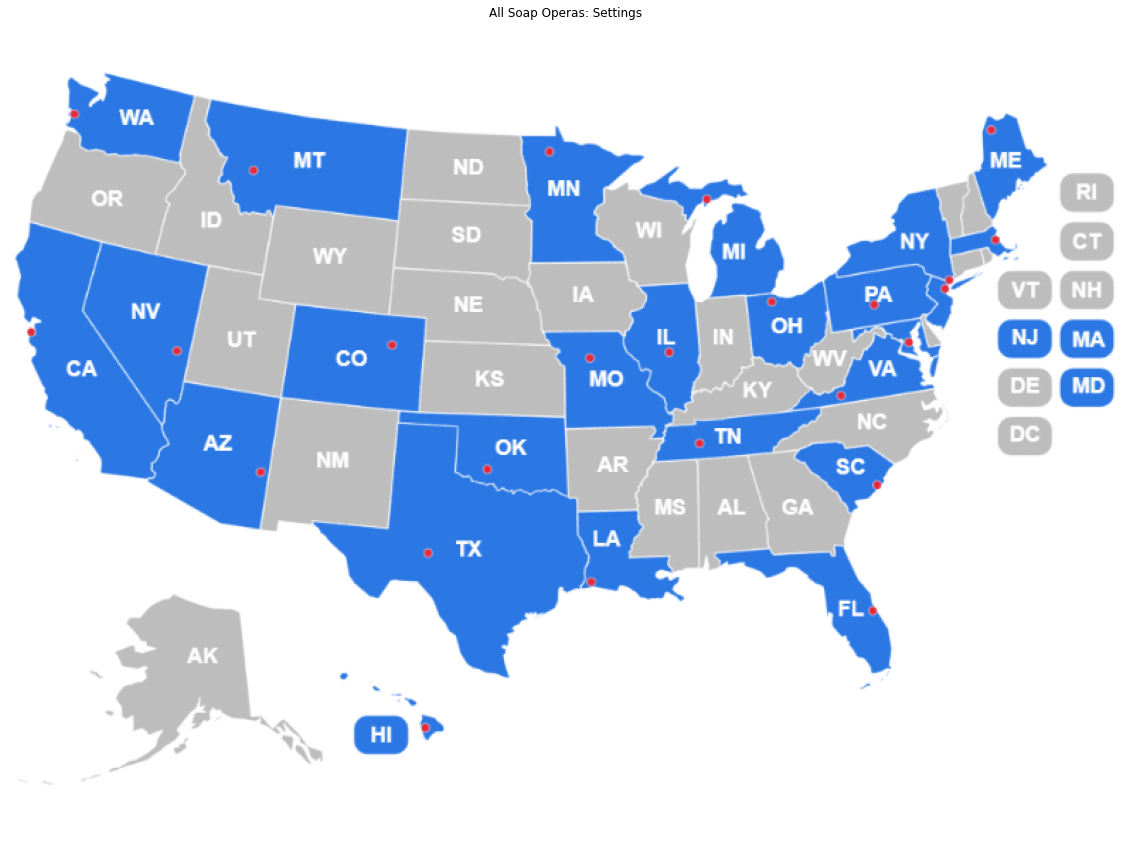

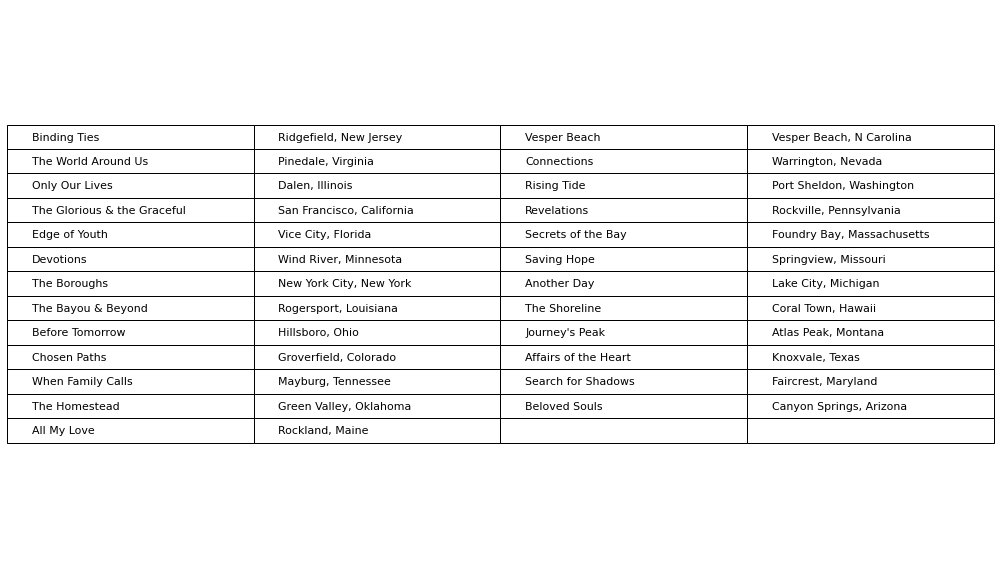

In [107]:
img_path_1 = r"C:\Users\zplew\Downloads\SoapSettingsMapUS.png"
img1 = mpimg.imread(img_path_1)
plt.figure(figsize=(20,16))
plt.imshow(img1)
plt.axis("off")
plt.title("All Soap Operas: Settings")

table_data = [
    ["Binding Ties", "Ridgefield, New Jersey", "Vesper Beach", "Vesper Beach, N Carolina"],
    ["The World Around Us", "Pinedale, Virginia", "Connections", "Warrington, Nevada"],
    ["Only Our Lives", "Dalen, Illinois", "Rising Tide", "Port Sheldon, Washington"],
    ["The Glorious & the Graceful", "San Francisco, California", "Revelations", "Rockville, Pennsylvania"],
    ["Edge of Youth", "Vice City, Florida", "Secrets of the Bay", "Foundry Bay, Massachusetts"],
    ["Devotions", "Wind River, Minnesota", "Saving Hope", "Springview, Missouri"],
    ["The Boroughs", "New York City, New York", "Another Day", "Lake City, Michigan"],
    ["The Bayou & Beyond", "Rogersport, Louisiana", "The Shoreline", "Coral Town, Hawaii"],
    ["Before Tomorrow", "Hillsboro, Ohio", "Journey's Peak", "Atlas Peak, Montana"],
    ["Chosen Paths", "Groverfield, Colorado", "Affairs of the Heart", "Knoxvale, Texas"],
    ["When Family Calls", "Mayburg, Tennessee", "Search for Shadows", "Faircrest, Maryland"],
    ["The Homestead", "Green Valley, Oklahoma", "Beloved Souls", "Canyon Springs, Arizona"],
    ["All My Love", "Rockland, Maine", "", ""]
]
fig, ax = plt.subplots(figsize=(14, 8))
ax.axis("off")
tbl = ax.table(
    cellText=table_data,
    loc="center",
    cellLoc="left"
)
tbl.auto_set_font_size(False)
tbl.set_fontsize(11)
tbl.scale(1, 1.6)
for (row, col), cell in tbl.get_celld().items():
    cell.set_facecolor("white")
    cell.set_edgecolor("black")
    cell.set_text_props(color="black")
plt
plt.tight_layout()
plt.show()

In [4]:
groups = {
    "Adult Women (51%)": {
        "Caucasian": 54,
        "African-American": 31,
        "Hispanic/Native": 10,
        "Asian": 4,
        "Other": 1
    },
    "Adult Men (10%)": {
        "Caucasian": 67,
        "African-American": 25,
        "Hispanic/Native": 7,
        "Asian": 1
    },
    "Male Teenagers / Young Adults (12%)": {
        "Caucasian": 42,
        "African-American": 38,
        "Hispanic/Native": 13,
        "Asian": 6,
        "Other": 1
    },
    "Female Teenagers / Young Adults (22%)": {
        "Caucasian": 46,
        "African-American": 27,
        "Hispanic/Native": 16,
        "Asian": 10,
        "Other": 1
    },
    "Senior Women (3%)": {
        "Caucasian": 63,
        "African-American": 24,
        "Hispanic/Native": 10,
        "Asian": 3
    },
    "Senior Men (2%)": {
        "Caucasian": 76,
        "African-American": 19,
        "Hispanic/Native": 4,
        "Asian": 1
    }
}

def showstats(group):
    data = groups[group]
    labels = list(data.keys())
    sizes = list(data.values())

    plt.figure(figsize=(6, 6))
    plt.pie(
        sizes,
        labels=labels,
        autopct="%1.0f%%",
        startangle=90
    )
    plt.title(f"Race Demographics for Age Group: {group}")
    plt.tight_layout()
    plt.show()

interact(
    showstats,
    group=Dropdown(
        options=list(groups.keys()),
        value="Adult Women (51%)",
        description=" Age Demographic:"
    )
)

interactive(children=(Dropdown(description=' Age Demographic:', options=('Adult Women (51%)', 'Adult Men (10%)…

<function __main__.showstats(group)>

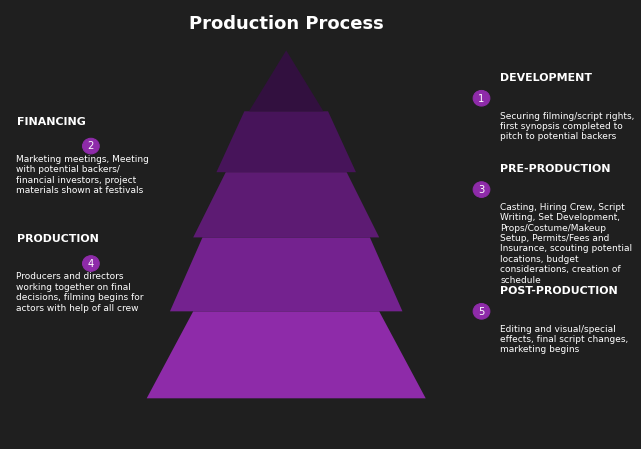

In [95]:
fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor("#1f1f1f")
ax.set_facecolor("#1f1f1f")
ax.set_xlim(-6, 6)
ax.set_ylim(0, 10)
ax.axis("off")

colors = ["#8e2ba9", "#74228f", "#5d1b73", "#47145a", "#32103f"]

layers = [
    [(-3,1), (3,1), (2,3), (-2,3)],
    [(-2.5,3), (2.5,3), (1.8,4.7), (-1.8,4.7)],
    [(-2,4.7), (2,4.7), (1.3,6.2), (-1.3,6.2)],
    [(-1.5,6.2), (1.5,6.2), (0.9,7.6), (-0.9,7.6)],
    [(-0.8,7.6), (0.8,7.6), (0,9), (-0.0,9)]
]

for pts, col in zip(layers, colors):
    ax.add_patch(Polygon(pts, closed=True, facecolor=col, edgecolor="none"))

ax.text(0, 9.5, "Production Process",
        color="white", fontsize=18, fontweight="bold",
        ha="center")

def marker(x, y, num):
    c = Circle((x, y), 0.18, color="#8e2ba9")
    ax.add_patch(c)
    ax.text(x, y, str(num), color="white",
            ha="center", va="center", fontsize=10)

marker(-4.2, 6.8, 2)
ax.text(-5.8, 7.3, "FINANCING",
        color="white", fontsize=11, fontweight="bold", ha="left")
ax.text(-5.8, 6.6,
        "Marketing meetings, Meeting\n"
        "with potential backers/\n"
        "financial investors, project\n"
        "materials shown at festivals",
        color="white", fontsize=9, ha="left", va="top")
marker(-4.2, 4.1, 4)
ax.text(-5.8, 4.6, "PRODUCTION",
        color="white", fontsize=11, fontweight="bold", ha="left")
ax.text(-5.8, 3.9,
        "Producers and directors\n"
        "working together on final\n"
        "decisions, filming begins for\n"
        "actors with help of all crew",
        color="white", fontsize=9, ha="left", va="top")
marker(4.2, 7.9, 1)
ax.text(4.6, 8.3, "DEVELOPMENT",
        color="white", fontsize=11, fontweight="bold", ha="left")
ax.text(4.6, 7.6,
        "Securing filming/script rights,\n"
        "first synopsis completed to\n"
        "pitch to potential backers",
        color="white", fontsize=9, ha="left", va="top")
marker(4.2, 5.8, 3)
ax.text(4.6, 6.2, "PRE-PRODUCTION",
        color="white", fontsize=11, fontweight="bold", ha="left")
ax.text(4.6, 5.5,
        "Casting, Hiring Crew, Script\n"
        "Writing, Set Development,\n"
        "Props/Costume/Makeup\n"
        "Setup, Permits/Fees and\n"
        "Insurance, scouting potential\n"
        "locations, budget\n"
        "considerations, creation of\n"
        "schedule",
        color="white", fontsize=9, ha="left", va="top")
marker(4.2, 3.0, 5)
ax.text(4.6, 3.4, "POST-PRODUCTION",
        color="white", fontsize=11, fontweight="bold", ha="left")
ax.text(4.6, 2.7,
        "Editing and visual/special\n"
        "effects, final script changes,\n"
        "marketing begins",
        color="white", fontsize=9, ha="left", va="top")
plt.show()

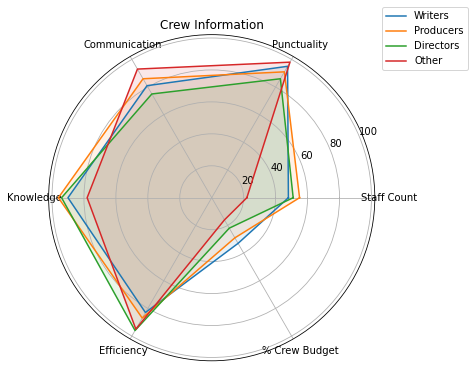

In [97]:
labels = [
    "Staff Count",
    "Punctuality",
    "Communication",
    "Knowledge",
    "Efficiency",
    "% Crew Budget"
]
crew_info = {
    "Writers":   [48, 95, 81, 90, 83, 33],
    "Producers": [55, 91, 86, 96, 87, 29],
    "Directors": [51, 86, 75, 94, 96, 22],
    "Other":     [22, 98, 93, 78, 95, 16]
}
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
for role, values in crew_info.items():
    values = values + values[:1]
    ax.plot(angles, values, label=role)
    ax.fill(angles, values, alpha=0.1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title("Crew Information")
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.show()

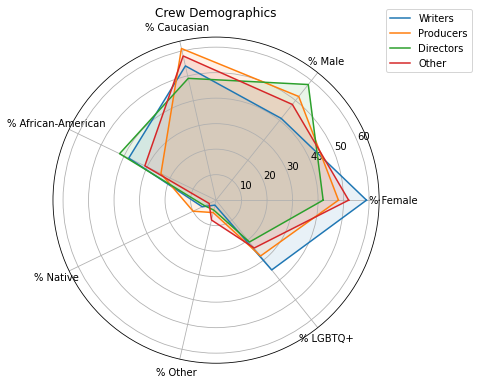

In [98]:
labels = [
    "% Female",
    "% Male",
    "% Caucasian",
    "% African-American",
    "% Native",
    "% Other",
    "% LGBTQ+"
]
crew_demo = {
    "Writers":   [59, 41, 54, 38, 6, 2, 35],
    "Producers": [48, 52, 61, 24,10, 5, 28],
    "Directors": [42, 58, 49, 42, 5, 4, 21],
    "Other":     [52, 48, 58, 31, 3, 8, 24]
}
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

for role, values in crew_demo.items():
    values = values + values[:1]
    ax.plot(angles, values, label=role)
    ax.fill(angles, values, alpha=0.1)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title("Crew Demographics")
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.show()


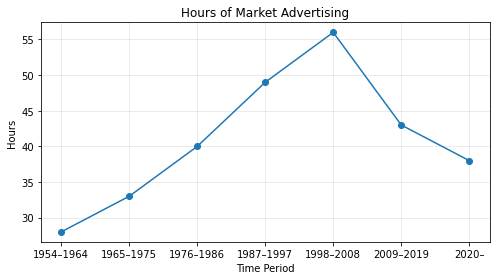

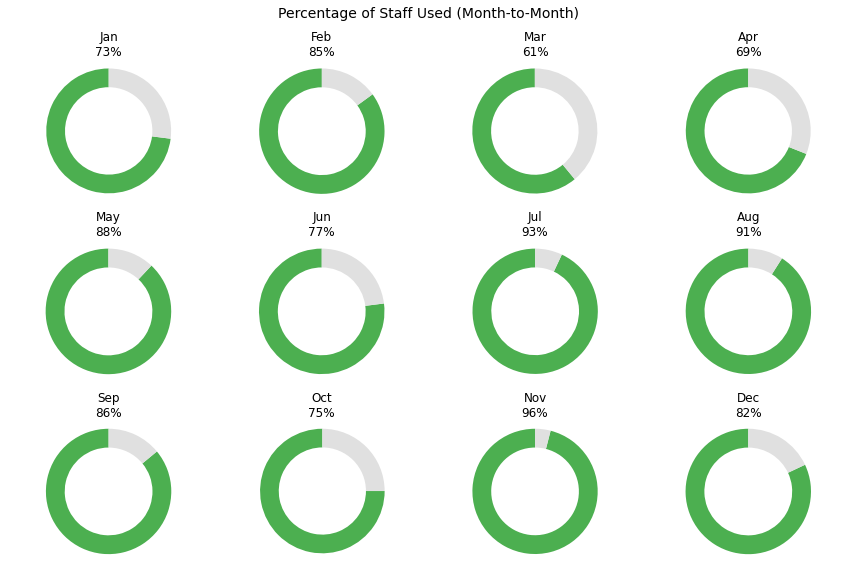

In [99]:
periods = [
    "1954–1964", "1965–1975", "1976–1986",
    "1987–1997", "1998–2008", "2009–2019", "2020–"
]
hours = [28, 33, 40, 49, 56, 43, 38]
plt.figure(figsize=(7,4))
plt.plot(periods, hours, marker="o")
plt.title("Hours of Market Advertising")
plt.xlabel("Time Period")
plt.ylabel("Hours")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

months = [
    "Jan","Feb","Mar","Apr","May","Jun",
    "Jul","Aug","Sep","Oct","Nov","Dec"
]
staff_used = [73, 85, 61, 69, 88, 77, 93, 91, 86, 75, 96, 82]
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for ax, month, val in zip(axes.flatten(), months, staff_used):
    ax.pie(
        [val, 100-val],
        startangle=90,
        colors=["#4CAF50", "#e0e0e0"],
        wedgeprops=dict(width=0.3)
    )
    ax.set_title(f"{month}\n{val}%")
    ax.axis("equal")
plt.suptitle("Percentage of Staff Used (Month-to-Month)", fontsize=14)
plt.tight_layout()
plt.show()

In [5]:
demographics = {
    "Race": {
        "White": 48,
        "African-American": 27,
        "Asian": 9,
        "Pacific Islander": 2,
        "Native": 14
    },
    "Gender": {
        "Female": 54,
        "Male": 45,
        "Intersex": 1
    },
    "Sexuality": {
        "Straight": 45,
        "Gay": 25,
        "Lesbian": 9,
        "Bisexual": 18,
        "Transgender": 2,
        "Other": 1
    },
    "Age Group": {
        "Infant/Toddler": 6,
        "Preteen": 13,
        "Teen/Young Adult": 19,
        "Adult": 52,
        "Senior": 10
    },
    "Income Class": {
        "Lower Class": 6,
        "Lower-Middle Class": 12,
        "Middle Class": 32,
        "Upper-Middle Class": 26,
        "Upper Class": 24
    },
    "Political Ideology": {
        "Liberal": 55,
        "Conservative": 34,
        "Nationalist": 3,
        "Environmentalist": 4,
        "Libertarian": 2,
        "Fascist/Communist": 1,
        "Anarchist": 1
    },
    "Religion": {
        "Christian": 39,
        "Muslim": 25,
        "Jewish": 8,
        "Presbyterian": 5,
        "Agnostic/Atheist": 21,
        "Other": 2
    },
    "Ethnicity": {
        "Caucasian/European": 40,
        "African-American": 27,
        "Hispanic/Latino": 15,
        "Asian": 8,
        "Native American": 3,
        "Pacific Islander": 2,
        "Middle Eastern": 4,
        "Other": 1
    },
    "Occupation": {
        "Education": 7,
        "Medicine": 19,
        "Law": 8,
        "Public Service": 6,
        "Media": 9,
        "Business": 15,
        "Customer Service": 5,
        "Store Owners": 12,
        "Sales": 6,
        "Science": 3,
        "Trade Work": 2,
        "Other": 8
    },
    "Nationality / Origin": {
        "American": 30,
        "European": 10,
        "African": 1,
        "Baltic": 1.25,
        "Mediterranean": 7,
        "Middle Eastern": 2.75,
        "Indian": 2,
        "Southeast Asian": 4,
        "Indonesian": 0.5,
        "Australian": 11,
        "Canadian": 8,
        "Mexican": 11,
        "Central American": 2.5,
        "South American": 0.75,
        "Caribbean": 0.25,
        "Russian": 1.75,
        "Chinese": 3.25,
        "Japanese/Korean": 3
    }
}

def character_demographic(category):
    data = demographics[category]
    labels = list(data.keys())
    values = list(data.values())

    plt.figure(figsize=(6, 6))
    plt.pie(
        values,
        labels=labels,
        autopct="%1.0f%%",
        startangle=90
    )
    plt.title(f"Character Demographics (by {category})")
    plt.tight_layout()
    plt.show()

interact(
    character_demographic,
    category=Dropdown(
        options=list(demographics.keys()),
        value="Race",
        description="Demographic:"
    )
)

interactive(children=(Dropdown(description='Demographic:', options=('Race', 'Gender', 'Sexuality', 'Age Group'…

<function __main__.character_demographic(category)>

In [6]:
viewer_polls = {
    "Favorite Character": {
        "Tracy Thorne": 9,
        "Sheryl Martin": 14,
        "Russ Jackson": 21,
        "Lena Clayton": 12,
        "Leah Spaulding": 8,
        "Elliot Jackson": 20,
        "Larry Crawford": 5,
        "Gabby Lopez": 7,
        "Others": 4
    },
    "Preferred Type of Storyline": {
        "Affair/Relationship": 22,
        "Whodunnit Mystery": 4,
        "Shared Backstory": 8,
        "Physical/Mental Health": 10,
        "Business": 6,
        "Blackmail/Scheme": 3,
        "Secret Family": 24,
        "Paternity/Custody": 16,
        "Mob": 7
    },
    "Favorite Storyline": {
        "Heart Transplant (Kathy & Maxine)": 21,
        "Sibling Sexual Abuse": 4,
        "Russ & Sheryl Romance": 27,
        "Luke & Lena Romance": 15,
        "The Conjoined Twins": 5,
        "Nathan's Shooting": 1,
        "Natalie's Sexual Assault": 2,
        "Lopez Cartel Past": 6,
        "Marshall Family Secrets": 19
    },
    "Favorite Showrunner": {
        "Roger Richter": 27,
        "Ewen Richter": 23,
        "Louise Maynard": 18,
        "Stuart Kellerman": 11,
        "Paul Burns": 21
    },
    "Favorite Head Writer": {
        "Roger Richter": 20,
        "Ewen Richter": 18,
        "Clarice Steinbeck": 16,
        "Akilah DeSouza": 10,
        "Gabrielle Manton": 11,
        "James O'Reilly": 2,
        "Emmett Collins": 4,
        "Adam Howard": 6,
        "Other": 13
    },
    "Preferred Episode Length": {
        "30 minutes": 13,
        "1 hour": 27,
        "90 minutes": 22,
        "2 hours": 38
    },
    "Favorite Family": {
        "Howard": 12,
        "Thorne": 24,
        "Burton": 9,
        "Martin": 16,
        "Jackson": 15,
        "Spaulding": 4,
        "Duquenesque": 10,
        "Lopez": 7,
        "Stone": 3
    },
    "Favorite Feud / Rivalry": {
        "Quinn vs Alexis": 10,
        "Ben vs Paul": 13,
        "Annie vs Pat": 14,
        "Sheryl vs Rachel": 19,
        "Kara vs Christine": 11,
        "Natalie vs Emma": 7,
        "Kara vs Emma": 6,
        "Adam vs Warren": 4,
        "Sheryl vs Karen": 16
    },
    "Favorite Friendship": {
        "Quinn & Tanya": 11,
        "Russ & Antonio": 5,
        "Maureen & Nadine": 18,
        "Tracy & Lena": 15,
        "Regina & Laurel": 7,
        "Maxine & Lindsay": 21,
        "Natalie & Emily": 9,
        "Brandon & Dominic": 12,
        "Brianna & Sydney": 2
    },
    "Favorite Supercouple": {
        "Russ & Sheryl": 21,
        "Luke & Lena": 16,
        "Lance & Natalie": 8,
        "Adam & Kara": 3,
        "Kyle & Leah": 11,
        "Brandon & Gabby": 5,
        "Elliot & Clay": 9,
        "Dominic & Julia": 6,
        "Lindsay & Andrew": 7
    },
    "Favorite Crisis Storyline": {
        "Earthquake (1993)": 8,
        "Train Wreck (2008)": 12,
        "Plane Crash (1998)": 6,
        "Hospital Explosion (1968)": 2,
        "Hostage Crisis (2017)": 21,
        "Highway Pile-Up (2021)": 3,
        "School Shooting (2020)": 4,
        "Thorne Towers Fire (2015)": 15,
        "Encephalitis Outbreak (2006)": 19
    },
    "Favorite Villain": {
        "Ed Spaulding": 15,
        "Paul Spaulding": 11,
        "Madeline Duquenesque": 22,
        "Michelle Stone": 8,
        "Mitch Hudson": 7,
        "Richard Pierce": 9,
        "Heinrich Stein": 3,
        "Sheila Porter": 18,
        "Delores Winters": 5,
        "Butch Jackson": 2
    },
    "Best Serial Killer": {
        "Jack in the Box Killer": 29,
        "Text Message Killer": 20,
        "Ridgefield Slasher": 13,
        "Angel of Death": 7,
        "Bayside Butcher": 6,
        "Southtown Strangler": 4,
        "Gloved Hand Killer": 2,
        "Davroproxis Killer": 1
    },
    "Favorite Leading Female": {
        "Sheryl Martin": 20,
        "Meena Cheng": 18,
        "Kara Burton": 17,
        "Julia Santiago": 15,
        "Lydia Jackson": 12,
        "Christine Reynolds": 10,
        "Gabby Lopez": 8,
        "Leah Spaulding": 7,
        "Natalie Marshall": 5
    },
    "Favorite Leading Male": {
        "Derek Morgan": 21,
        "Russ Jackson": 19,
        "Adam Howard": 15,
        "Brandon Spaulding": 13,
        "Elliot Jackson": 10,
        "Bill Hughes": 8,
        "Darren Marshall": 6,
        "Audrey Thomas": 6,
        "Aaron Roberts": 5
    },
    "Best Episode (Air Date)": {
        "9/16/1979": 23,
        "7/5/1981": 21,
        "9/16/1961": 2,
        "4/3/1969": 4,
        "11/15/1991": 6,
        "1/8/2002": 10,
        "12/9/2009": 11,
        "3/18/2015": 14,
        "10/20/2020": 9
    },
    "Best Mob Family": {
        "Adam-Morgan": 25,
        "Ziegler": 17,
        "Brady": 19.5,
        "Correra": 6.75,
        "Del Conte": 11.5,
        "Yamada": 3.25,
        "Han": 3.75,
        "Roskova": 2.25
    },
    "Favorite Teen / Young Adult Era": {
        "Early-Mid 1990s": 14.5,
        "Late 1990s-Early 2000s": 18.5,
        "Mid 2000s": 15.5,
        "Late 2000s-Early 2010s": 12.5,
        "Mid 2010s": 9.5,
        "Late 2010s-Early 2020s": 21.5,
        "Mid 2020s": 8
    }
}

def viewer_poll(category):
    data = viewer_polls[category]
    labels = list(data.keys())
    values = list(data.values())

    plt.figure(figsize=(6, 6))
    plt.pie(
        values,
        labels=labels,
        autopct="%1.0f%%",
        startangle=90
    )
    plt.title(f"Viewer Polls — {category}")
    plt.tight_layout()
    plt.show()

interact(
    viewer_poll,
    category=Dropdown(
        options=list(viewer_polls.keys()),
        value="Favorite Character",
        description="Viewer Poll:"
    )
)

interactive(children=(Dropdown(description='Viewer Poll:', options=('Favorite Character', 'Preferred Type of S…

<function __main__.viewer_poll(category)>

# CITY OF RIDGEFIELD INFORMATION

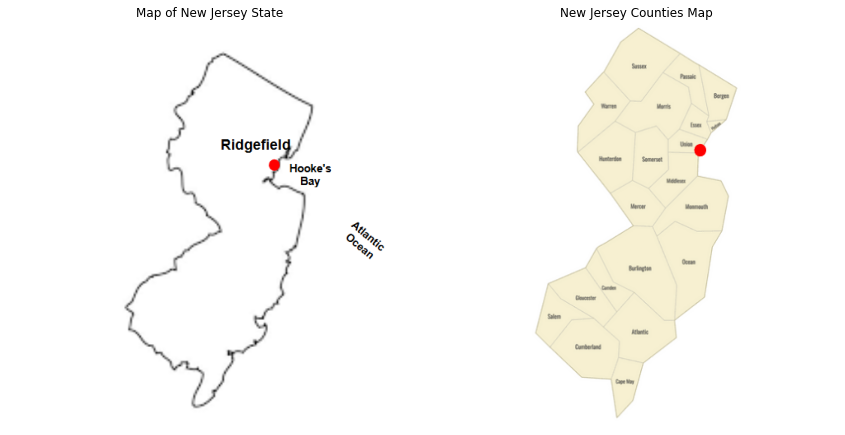

In [13]:
img_path_1 = r"C:\Users\zplew\Downloads\NewJerseyMap.png"
img_path_2 = r"C:\Users\zplew\Downloads\NewJerseyCountiesMap.png"
img1 = mpimg.imread(img_path_1)
img2 = mpimg.imread(img_path_2)
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(12, 6)
)
axes[0].imshow(img1)
axes[0].axis("off")
axes[0].set_title("Map of New Jersey State")
axes[1].imshow(img2)
axes[1].axis("off")
axes[1].set_title("New Jersey Counties Map")
plt.tight_layout()
plt.show()

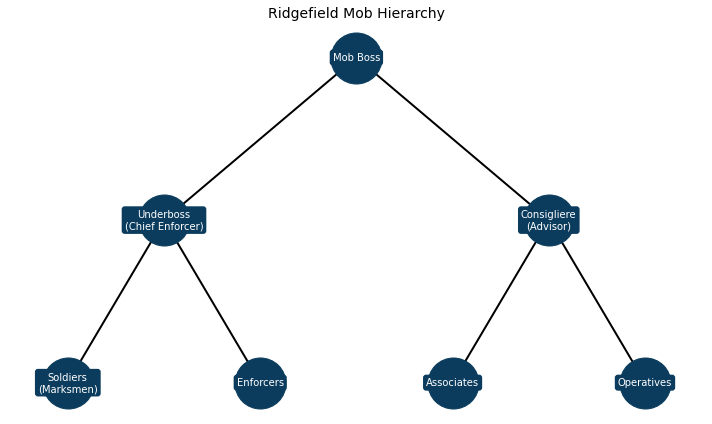

In [16]:
G = nx.DiGraph()
roles = [
    "Mob Boss",
    "Underboss\n(Chief Enforcer)",
    "Consigliere\n(Advisor)",
    "Soldiers\n(Marksmen)",
    "Enforcers",
    "Associates",
    "Operatives"
]
G.add_nodes_from(roles)
G.add_edges_from([
    ("Mob Boss", "Underboss\n(Chief Enforcer)"),
    ("Mob Boss", "Consigliere\n(Advisor)"),
    ("Underboss\n(Chief Enforcer)", "Soldiers\n(Marksmen)"),
    ("Underboss\n(Chief Enforcer)", "Enforcers"),
    ("Consigliere\n(Advisor)", "Associates"),
    ("Consigliere\n(Advisor)", "Operatives"),
])
pos = {
    "Mob Boss": (0, 3),
    "Underboss\n(Chief Enforcer)": (-1, 2),
    "Consigliere\n(Advisor)": (1, 2),
    "Soldiers\n(Marksmen)": (-1.5, 1),
    "Enforcers": (-0.5, 1),
    "Associates": (0.5, 1),
    "Operatives": (1.5, 1),
}

plt.figure(figsize=(10, 6))
nx.draw_networkx_nodes(
    G, pos,
    node_size=2600,
    node_color="#0B3C5D"
)
nx.draw_networkx_edges(G, pos, width=2)
nx.draw_networkx_labels(
    G, pos,
    font_size=10,
    font_color="white",
    bbox=dict(
        facecolor="#0B3C5D",
        edgecolor="none",
        boxstyle="round,pad=0.3"
    )
)
plt.title("Ridgefield Mob Hierarchy", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()

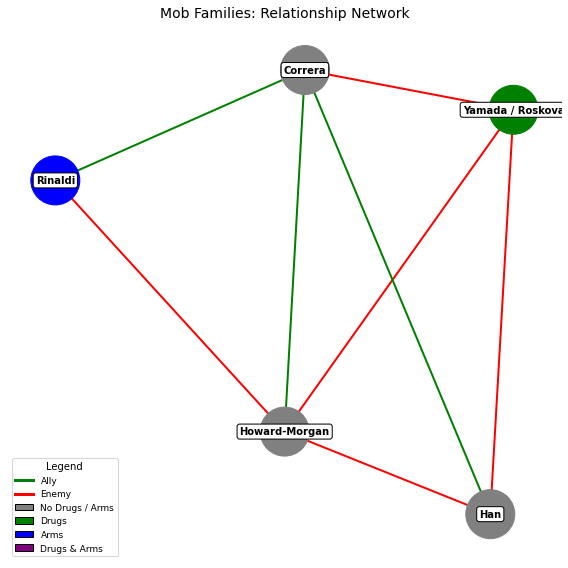

In [20]:
G = nx.Graph()
families = {
    "Howard-Morgan": {"drugs": False, "arms": False},
    "Correra": {"drugs": False, "arms": False},
    "Yamada / Roskova": {"drugs": True, "arms": False},
    "Rinaldi": {"drugs": False, "arms": True},
    "Han": {"drugs": False, "arms": False},
}

for f, attr in families.items():
    G.add_node(f, **attr)
allies = [
    ("Howard-Morgan", "Correra"),
    ("Correra", "Han"),
    ("Rinaldi", "Correra"),
]
enemies = [
    ("Howard-Morgan", "Rinaldi"),
    ("Howard-Morgan", "Yamada / Roskova"),
    ("Howard-Morgan", "Han"),
    ("Correra", "Yamada / Roskova"),
    ("Yamada / Roskova", "Han"),
]
for u, v in allies:
    G.add_edge(u, v, relation="ally")
for u, v in enemies:
    G.add_edge(u, v, relation="enemy")
node_colors = []
for n in G.nodes:
    d = G.nodes[n]["drugs"]
    a = G.nodes[n]["arms"]
    if d and a:
        node_colors.append("purple")
    elif d:
        node_colors.append("green")
    elif a:
        node_colors.append("blue")
    else:
        node_colors.append("gray")

edge_colors = [
    "green" if G[u][v]["relation"] == "ally" else "red"
    for u, v in G.edges
]
pos = nx.spring_layout(G, seed=7)

plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(
    G, pos,
    node_color=node_colors,
    node_size=2400
)
nx.draw_networkx_edges(
    G, pos,
    edge_color=edge_colors,
    width=2
)
nx.draw_networkx_labels(
    G, pos,
    font_size=10,
    font_weight="bold",
    bbox=dict(
        facecolor="white",
        edgecolor="black",
        boxstyle="round,pad=0.25"
    )
)
plt.title("Mob Families: Relationship Network", fontsize=14)
plt.axis("off")
edge_legend = [
    Line2D([0], [0], color="green", lw=3, label="Ally"),
    Line2D([0], [0], color="red", lw=3, label="Enemy"),
]
node_legend = [
    Patch(facecolor="gray", edgecolor="black", label="No Drugs / Arms"),
    Patch(facecolor="green", edgecolor="black", label="Drugs"),
    Patch(facecolor="blue", edgecolor="black", label="Arms"),
    Patch(facecolor="purple", edgecolor="black", label="Drugs & Arms"),
]
plt.legend(
    handles=edge_legend + node_legend,
    loc="lower left",
    frameon=True,
    fontsize=9,
    title="Legend", 
)
plt.tight_layout()
plt.show()

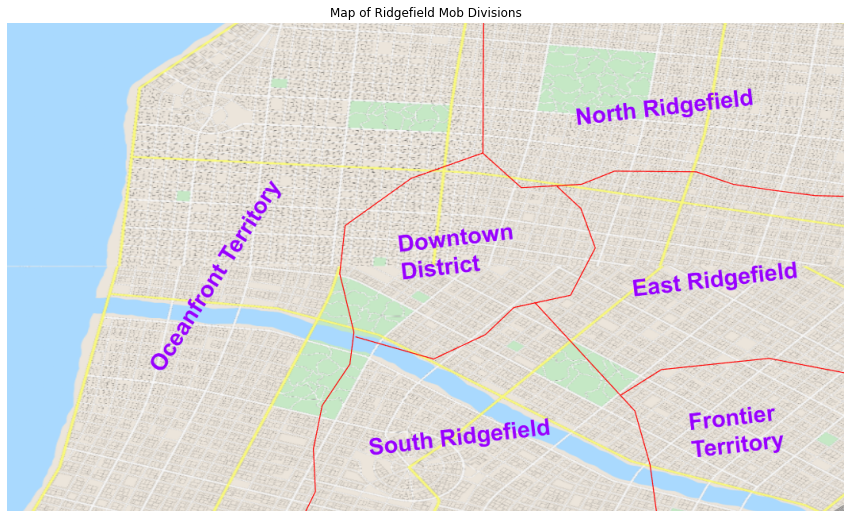

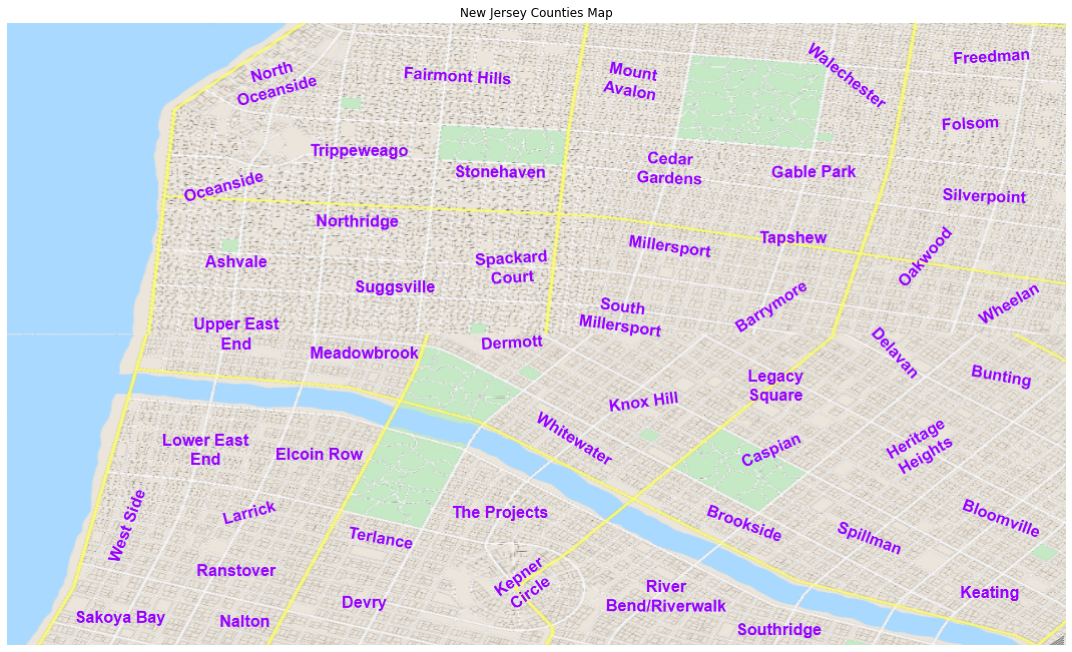

In [25]:
img_path_1 = r"C:\Users\zplew\Downloads\Ridgefield Mob Divisions Map.png"
img_path_2 = r"C:\Users\zplew\Downloads\Ridgefield Neighborhoods Map.png"
img1 = mpimg.imread(img_path_1)
img2 = mpimg.imread(img_path_2)
plt.figure(figsize=(15,12))
plt.imshow(img1)
plt.axis("off")
plt.title("Map of Ridgefield Mob Divisions")
plt.figure(figsize=(15,12))
plt.imshow(img2)
plt.axis("off")
plt.title("New Jersey Counties Map")
plt.tight_layout()
plt.show()

### Utilities and Infrastructure

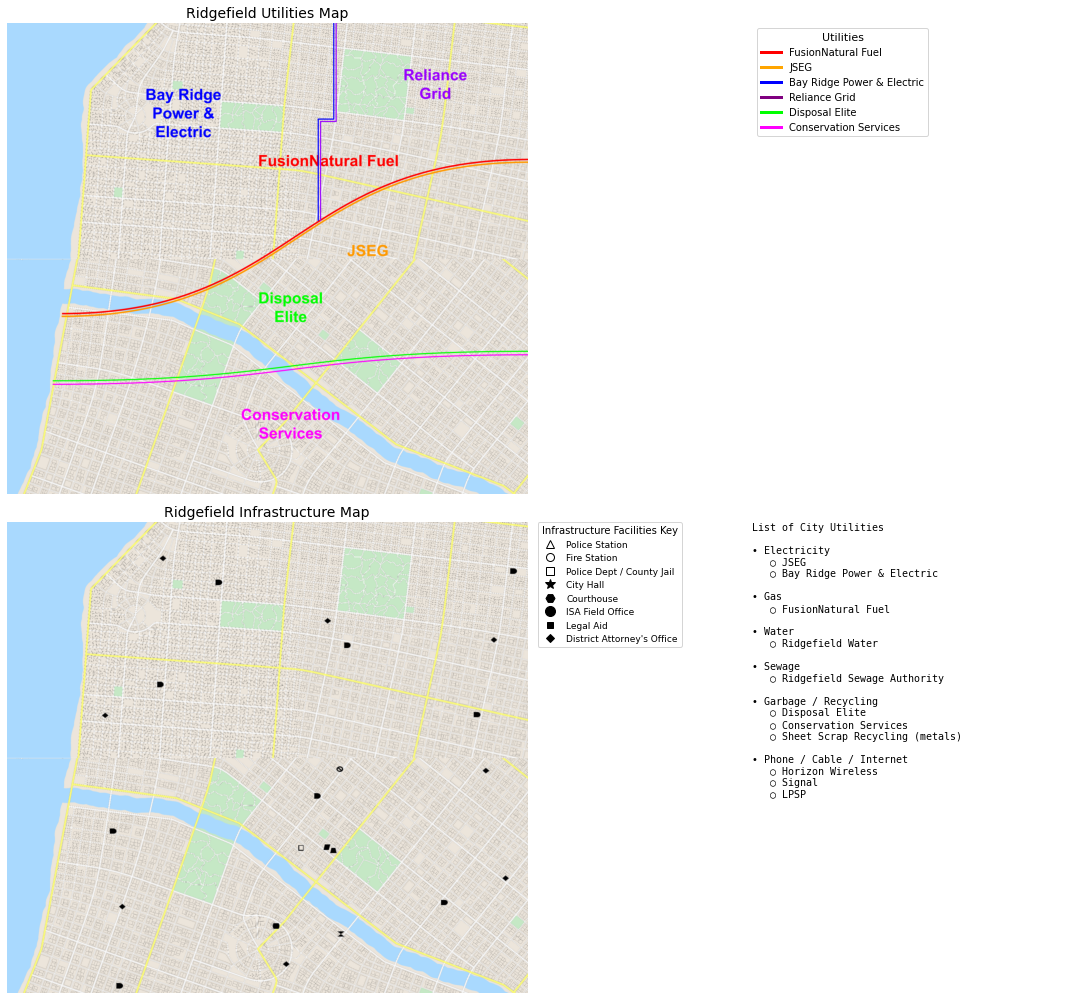

In [34]:
img_path_1 = r"C:\Users\zplew\Downloads\Map of Ridgefield Utilities .png"
img_path_2 = r"C:\Users\zplew\Downloads\Map of Ridgefield's Infrastructure Facilities.png"
img1 = mpimg.imread(img_path_1)
img2 = mpimg.imread(img_path_2)

fig, axes = plt.subplots(
    nrows=2,
    ncols=2,
    figsize=(18, 14),
    gridspec_kw={"width_ratios": [3, 1]}
)
axes[0, 0].imshow(img1)
axes[0, 0].set_title("Ridgefield Utilities Map", fontsize=14)
axes[0, 0].axis("off")
axes[1, 0].imshow(img2)
axes[1, 0].set_title("Ridgefield Infrastructure Map", fontsize=14)
axes[1, 0].axis("off")
axes[0, 1].axis("off")
axes[1, 1].axis("off")

legend_lines = [
    Line2D([0], [0], color="red", lw=3, label="FusionNatural Fuel"),
    Line2D([0], [0], color="orange", lw=3, label="JSEG"),
    Line2D([0], [0], color="blue", lw=3, label="Bay Ridge Power & Electric"),
    Line2D([0], [0], color="purple", lw=3, label="Reliance Grid"),
    Line2D([0], [0], color="lime", lw=3, label="Disposal Elite"),
    Line2D([0], [0], color="magenta", lw=3, label="Conservation Services"),
]

axes[0, 1].legend(
    handles=legend_lines,
    title="Utilities",
    loc="upper left",
    frameon=True,
    fontsize=10,
    title_fontsize=11
)

utility_text = (
    "List of City Utilities\n\n"
    "• Electricity\n"
    "   ○ JSEG\n"
    "   ○ Bay Ridge Power & Electric\n\n"
    "• Gas\n"
    "   ○ FusionNatural Fuel\n\n"
    "• Water\n"
    "   ○ Ridgefield Water\n\n"
    "• Sewage\n"
    "   ○ Ridgefield Sewage Authority\n\n"
    "• Garbage / Recycling\n"
    "   ○ Disposal Elite\n"
    "   ○ Conservation Services\n"
    "   ○ Sheet Scrap Recycling (metals)\n\n"
    "• Phone / Cable / Internet\n"
    "   ○ Horizon Wireless\n"
    "   ○ Signal\n"
    "   ○ LPSP"
)

axes[1, 1].text(
    0,
    1,
    utility_text,
    va="top",
    ha="left",
    fontsize=10,
    family="monospace"
)

infra_legend = [
    Line2D([0], [0], marker='^', markerfacecolor='none',
           markeredgecolor='black', linestyle='None',
           markersize=8, label='Police Station'),
    Line2D([0], [0], marker='o', markerfacecolor='none',
           markeredgecolor='black', linestyle='None',
           markersize=8, label='Fire Station'),
    Line2D([0], [0], marker='s', markerfacecolor='none',
           markeredgecolor='black', linestyle='None',
           markersize=8, label='Police Dept / County Jail'),
    Line2D([0], [0], marker='*', color='black', linestyle='None',
           markersize=10, label='City Hall'),
    Line2D([0], [0], marker='H', color='black', linestyle='None',
           markersize=9, label='Courthouse'),
    Line2D([0], [0], marker='o', color='black', linestyle='None',
           markersize=10, label='ISA Field Office'),
    Line2D([0], [0], marker='s', color='black', linestyle='None',
           markersize=6, label='Legal Aid'),
    Line2D([0], [0], marker='D', color='black', linestyle='None',
           markersize=6, label="District Attorney's Office"),
]

axes[1, 0].legend(
    handles=infra_legend,
    title="Infrastructure Facilities Key",
    loc="upper left",
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0,
    frameon=True,
    fontsize=9,
    title_fontsize=10
)

plt.tight_layout()
plt.show()

### Transportation Lines

C:\Users\zplew\AppData\Local\Temp/ipykernel_26900/811749001.py:217: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


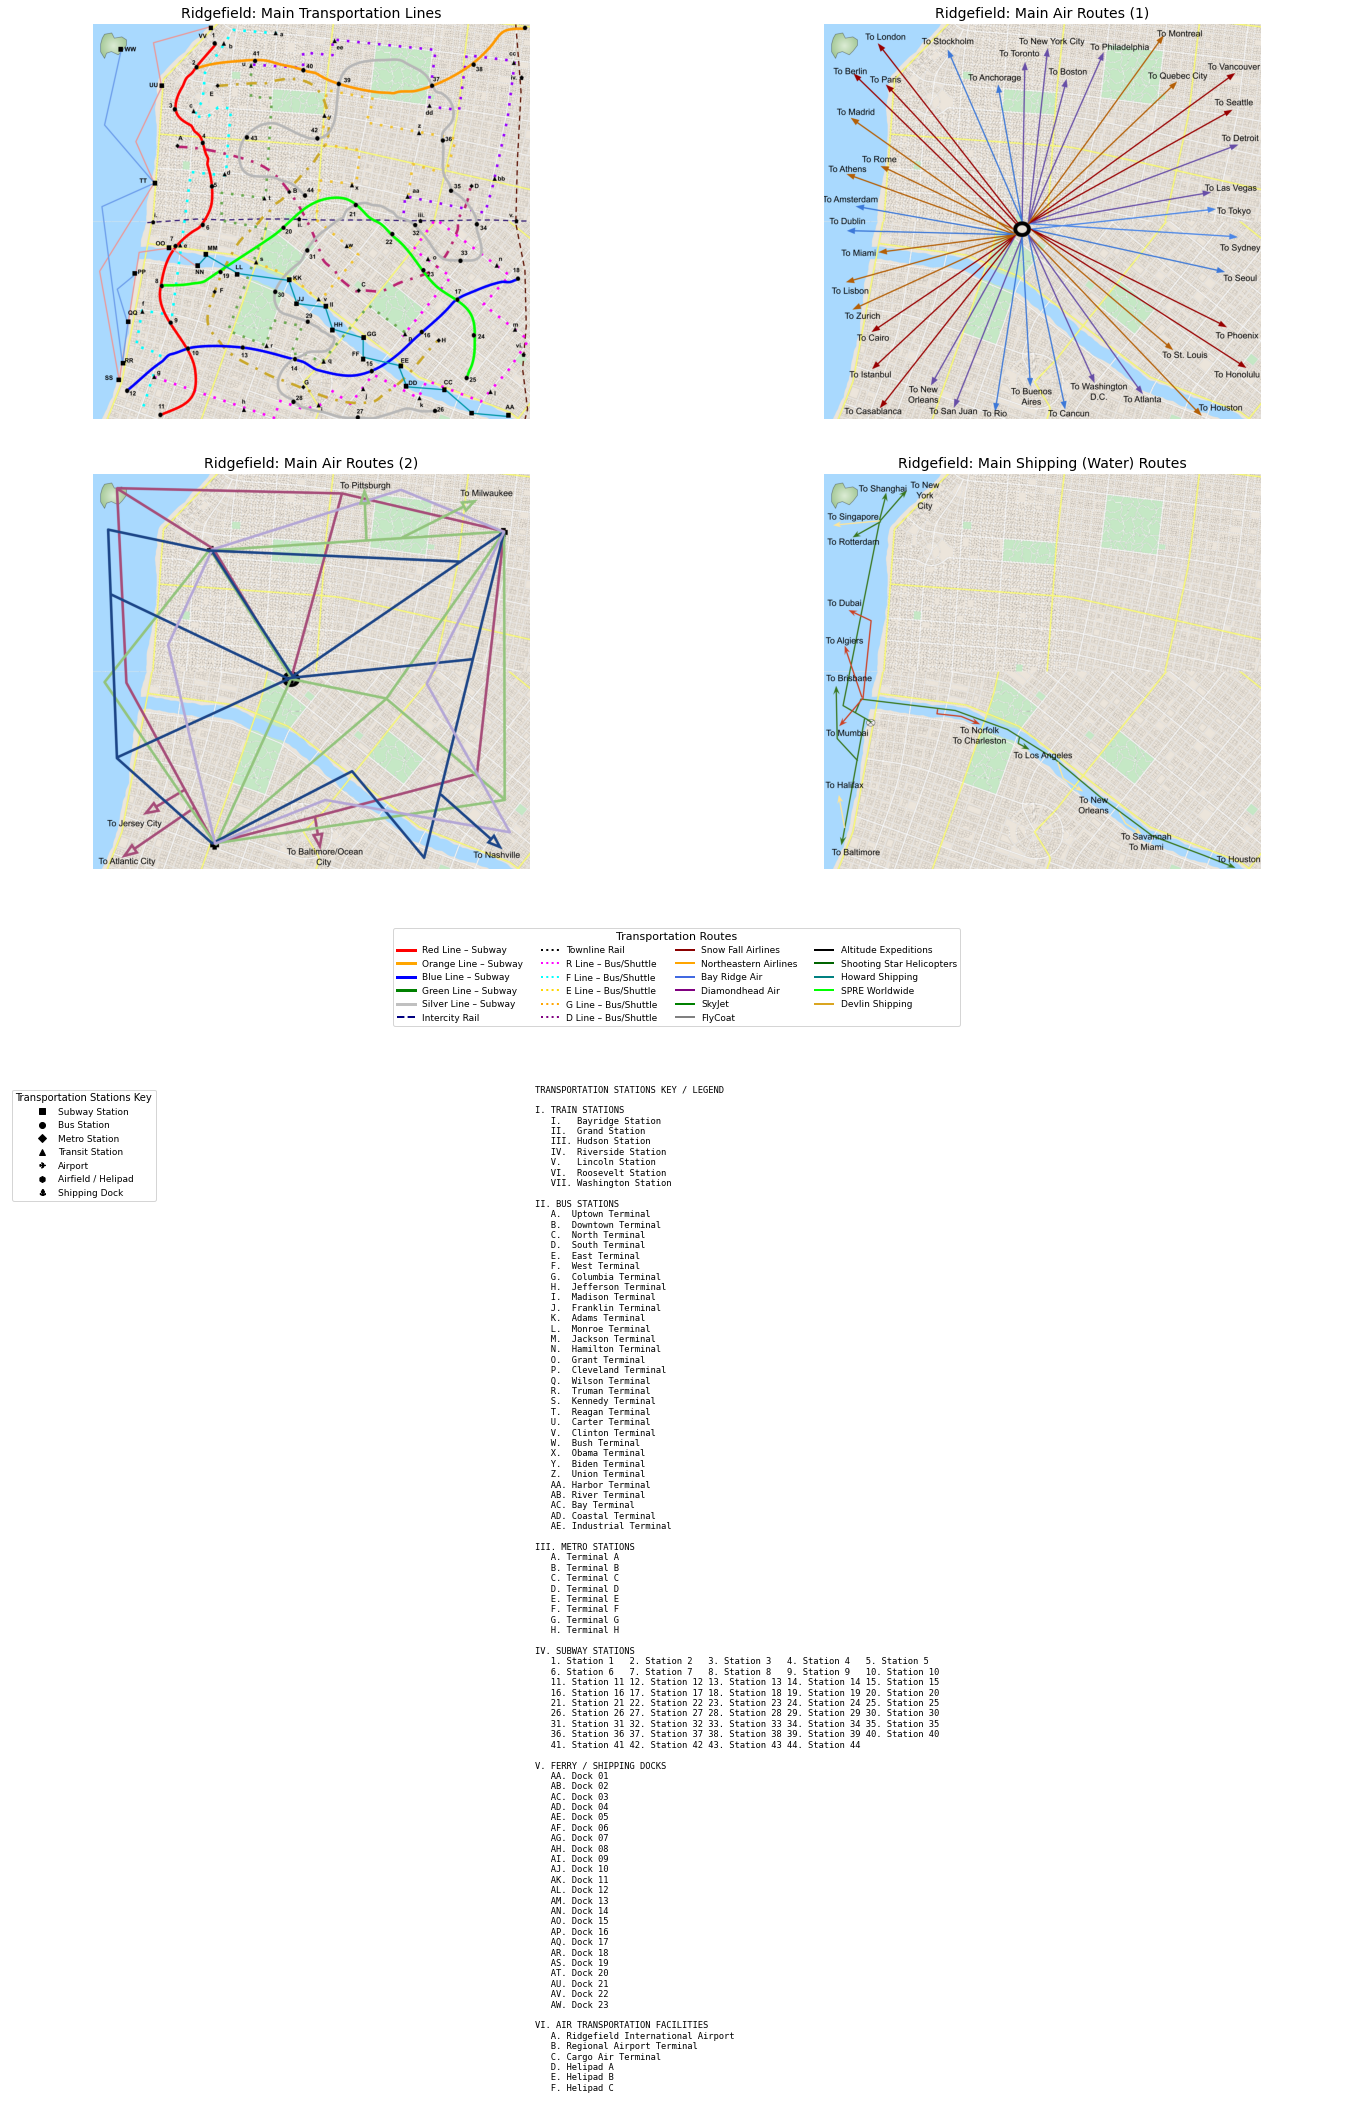

In [39]:
img_paths = [
    r"C:\Users\zplew\Downloads\Map of Ridgefield's Main Transportation Routes.png",
    r"C:\Users\zplew\Downloads\Map of Ridgefield's Air Routes 1.png",
    r"C:\Users\zplew\Downloads\Map of Ridgefield's Air Routes 2.png",
    r"C:\Users\zplew\Downloads\Map of Ridgefield's Water (Shipping) Routes.png",
]

imgs = [mpimg.imread(p) for p in img_paths]

fig = plt.figure(figsize=(24, 22))
gs = fig.add_gridspec(
    nrows=3,
    ncols=2,
    height_ratios=[1.2, 1.2, 0.9],
    hspace=0.15
)
axes_maps = [
    fig.add_subplot(gs[0, 0]),
    fig.add_subplot(gs[0, 1]),
    fig.add_subplot(gs[1, 0]),
    fig.add_subplot(gs[1, 1]),
]

titles = [
    "Ridgefield: Main Transportation Lines",
    "Ridgefield: Main Air Routes (1)",
    "Ridgefield: Main Air Routes (2)",
    "Ridgefield: Main Shipping (Water) Routes",
]

for ax, img, title in zip(axes_maps, imgs, titles):
    ax.imshow(img)
    ax.set_title(title, fontsize=14)
    ax.axis("off")
gs_leg = gs[2, :].subgridspec(2, 2, width_ratios=[1, 2], height_ratios=[1, 1])
ax_routes = fig.add_subplot(gs_leg[0, :])
ax_symbols = fig.add_subplot(gs_leg[1, 0])
ax_codes = fig.add_subplot(gs_leg[1, 1])

for ax in (ax_routes, ax_symbols, ax_codes):
    ax.axis("off")
route_legend = [
    Line2D([0],[0], color='red', lw=3, label='Red Line – Subway'),
    Line2D([0],[0], color='orange', lw=3, label='Orange Line – Subway'),
    Line2D([0],[0], color='blue', lw=3, label='Blue Line – Subway'),
    Line2D([0],[0], color='green', lw=3, label='Green Line – Subway'),
    Line2D([0],[0], color='silver', lw=3, label='Silver Line – Subway'),
    Line2D([0],[0], color='navy', lw=2, linestyle='--', label='Intercity Rail'),
    Line2D([0],[0], color='black', lw=2, linestyle=':', label='Townline Rail'),
    Line2D([0],[0], color='magenta', lw=2, linestyle=':', label='R Line – Bus/Shuttle'),
    Line2D([0],[0], color='cyan', lw=2, linestyle=':', label='F Line – Bus/Shuttle'),
    Line2D([0],[0], color='gold', lw=2, linestyle=':', label='E Line – Bus/Shuttle'),
    Line2D([0],[0], color='orange', lw=2, linestyle=':', label='G Line – Bus/Shuttle'),
    Line2D([0],[0], color='purple', lw=2, linestyle=':', label='D Line – Bus/Shuttle'),
    Line2D([0],[0], color='darkred', lw=2, label='Snow Fall Airlines'),
    Line2D([0],[0], color='orange', lw=2, label='Northeastern Airlines'),
    Line2D([0],[0], color='royalblue', lw=2, label='Bay Ridge Air'),
    Line2D([0],[0], color='purple', lw=2, label='Diamondhead Air'),
    Line2D([0],[0], color='green', lw=2, label='SkyJet'),
    Line2D([0],[0], color='gray', lw=2, label='FlyCoat'),
    Line2D([0],[0], color='black', lw=2, label='Altitude Expeditions'),
    Line2D([0],[0], color='darkgreen', lw=2, label='Shooting Star Helicopters'),
    Line2D([0],[0], color='teal', lw=2, label='Howard Shipping'),
    Line2D([0],[0], color='lime', lw=2, label='SPRE Worldwide'),
    Line2D([0],[0], color='goldenrod', lw=2, label='Devlin Shipping'),
]

ax_routes.legend(
    handles=route_legend,
    title="Transportation Routes",
    ncol=4,
    loc="upper center",
    frameon=True,
    fontsize=9,
    title_fontsize=11
)
symbol_legend = [
    Line2D([0],[0], marker='s', color='black', linestyle='None', label='Subway Station'),
    Line2D([0],[0], marker='o', color='black', linestyle='None', label='Bus Station'),
    Line2D([0],[0], marker='D', color='black', linestyle='None', label='Metro Station'),
    Line2D([0],[0], marker='^', color='black', linestyle='None', label='Transit Station'),
    Line2D([0],[0], marker='$✈$', color='black', linestyle='None', label='Airport'),
    Line2D([0],[0], marker='h', color='black', linestyle='None', label='Airfield / Helipad'),
    Line2D([0],[0], marker='$⚓$', color='black', linestyle='None', label='Shipping Dock'),
]

ax_symbols.legend(
    handles=symbol_legend,
    title="Transportation Stations Key",
    loc="upper left",
    frameon=True,
    fontsize=9,
    title_fontsize=10
)
master_transportation_key = (
    "TRANSPORTATION STATIONS KEY / LEGEND\n\n"

    "I. TRAIN STATIONS\n"
    "   I.   Bayridge Station\n"
    "   II.  Grand Station\n"
    "   III. Hudson Station\n"
    "   IV.  Riverside Station\n"
    "   V.   Lincoln Station\n"
    "   VI.  Roosevelt Station\n"
    "   VII. Washington Station\n\n"

    "II. BUS STATIONS\n"
    "   A.  Uptown Terminal\n"
    "   B.  Downtown Terminal\n"
    "   C.  North Terminal\n"
    "   D.  South Terminal\n"
    "   E.  East Terminal\n"
    "   F.  West Terminal\n"
    "   G.  Columbia Terminal\n"
    "   H.  Jefferson Terminal\n"
    "   I.  Madison Terminal\n"
    "   J.  Franklin Terminal\n"
    "   K.  Adams Terminal\n"
    "   L.  Monroe Terminal\n"
    "   M.  Jackson Terminal\n"
    "   N.  Hamilton Terminal\n"
    "   O.  Grant Terminal\n"
    "   P.  Cleveland Terminal\n"
    "   Q.  Wilson Terminal\n"
    "   R.  Truman Terminal\n"
    "   S.  Kennedy Terminal\n"
    "   T.  Reagan Terminal\n"
    "   U.  Carter Terminal\n"
    "   V.  Clinton Terminal\n"
    "   W.  Bush Terminal\n"
    "   X.  Obama Terminal\n"
    "   Y.  Biden Terminal\n"
    "   Z.  Union Terminal\n"
    "   AA. Harbor Terminal\n"
    "   AB. River Terminal\n"
    "   AC. Bay Terminal\n"
    "   AD. Coastal Terminal\n"
    "   AE. Industrial Terminal\n\n"

    "III. METRO STATIONS\n"
    "   A. Terminal A\n"
    "   B. Terminal B\n"
    "   C. Terminal C\n"
    "   D. Terminal D\n"
    "   E. Terminal E\n"
    "   F. Terminal F\n"
    "   G. Terminal G\n"
    "   H. Terminal H\n\n"

    "IV. SUBWAY STATIONS\n"
    "   1. Station 1   2. Station 2   3. Station 3   4. Station 4   5. Station 5\n"
    "   6. Station 6   7. Station 7   8. Station 8   9. Station 9   10. Station 10\n"
    "   11. Station 11 12. Station 12 13. Station 13 14. Station 14 15. Station 15\n"
    "   16. Station 16 17. Station 17 18. Station 18 19. Station 19 20. Station 20\n"
    "   21. Station 21 22. Station 22 23. Station 23 24. Station 24 25. Station 25\n"
    "   26. Station 26 27. Station 27 28. Station 28 29. Station 29 30. Station 30\n"
    "   31. Station 31 32. Station 32 33. Station 33 34. Station 34 35. Station 35\n"
    "   36. Station 36 37. Station 37 38. Station 38 39. Station 39 40. Station 40\n"
    "   41. Station 41 42. Station 42 43. Station 43 44. Station 44\n\n"

    "V. FERRY / SHIPPING DOCKS\n"
    "   AA. Dock 01\n"
    "   AB. Dock 02\n"
    "   AC. Dock 03\n"
    "   AD. Dock 04\n"
    "   AE. Dock 05\n"
    "   AF. Dock 06\n"
    "   AG. Dock 07\n"
    "   AH. Dock 08\n"
    "   AI. Dock 09\n"
    "   AJ. Dock 10\n"
    "   AK. Dock 11\n"
    "   AL. Dock 12\n"
    "   AM. Dock 13\n"
    "   AN. Dock 14\n"
    "   AO. Dock 15\n"
    "   AP. Dock 16\n"
    "   AQ. Dock 17\n"
    "   AR. Dock 18\n"
    "   AS. Dock 19\n"
    "   AT. Dock 20\n"
    "   AU. Dock 21\n"
    "   AV. Dock 22\n"
    "   AW. Dock 23\n\n"

    "VI. AIR TRANSPORTATION FACILITIES\n"
    "   A. Ridgefield International Airport\n"
    "   B. Regional Airport Terminal\n"
    "   C. Cargo Air Terminal\n"
    "   D. Helipad A\n"
    "   E. Helipad B\n"
    "   F. Helipad C\n"
)

ax_codes.text(
    0,
    1,
    master_transportation_key,
    va="top",
    ha="left",
    fontsize=8.8,
    family="monospace",
    wrap=True
)

plt.tight_layout()
plt.show()


### Economy, Politics, Geography and Climate

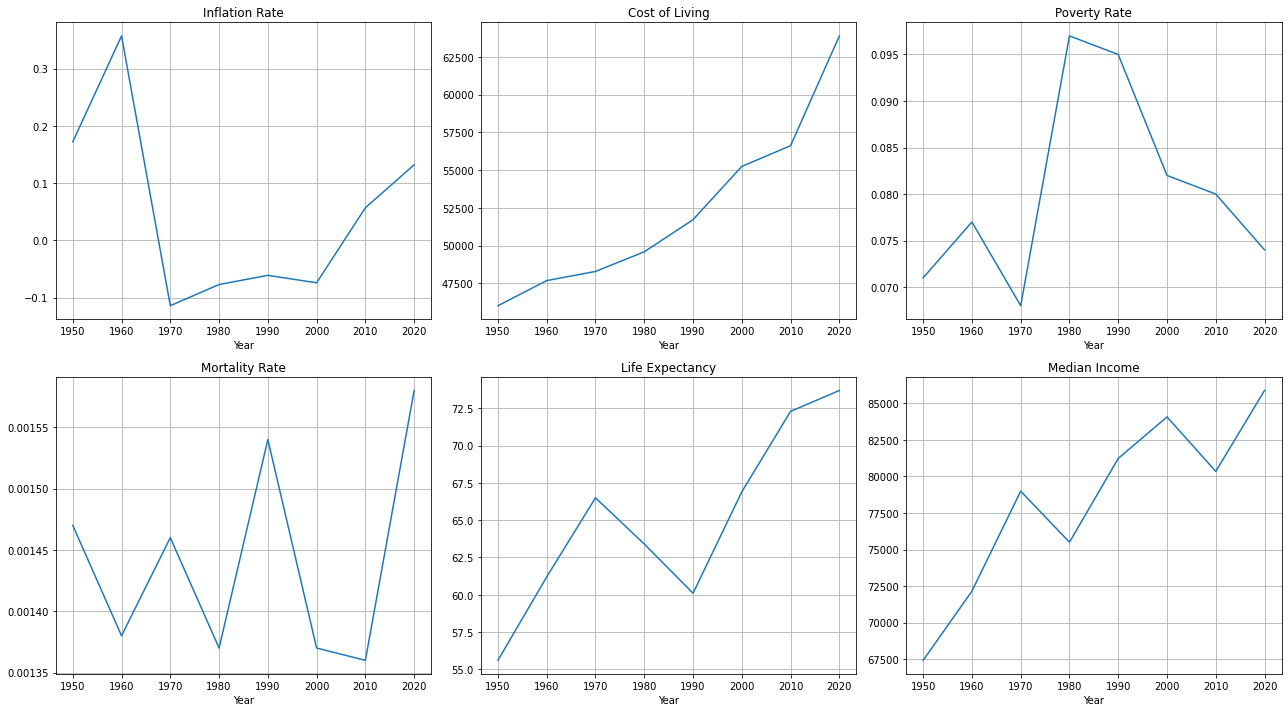

In [40]:
years = np.array([1950,1960,1970,1980,1990,2000,2010,2020])
inflation = np.array([0.172,0.357,-0.114,-0.077,-0.061,-0.074,0.057,0.132])
cost_living = np.array([46021.92,47686.44,48292.08,49591.92,51719.52,55248.72,56619.96,63894.36])
poverty = np.array([0.071,0.077,0.068,0.097,0.095,0.082,0.080,0.074])
mortality = np.array([0.00147,0.00138,0.00146,0.00137,0.00154,0.00137,0.00136,0.00158])
life_exp = np.array([55.6,61.2,66.5,63.4,60.1,66.9,72.3,73.7])
income = np.array([67415,72149,78993,75501,81234,84077,80348,85886])
fig, axs = plt.subplots(2, 3, figsize=(18,10))
axs[0,0].plot(years, inflation)
axs[0,0].set_title("Inflation Rate")
axs[0,1].plot(years, cost_living)
axs[0,1].set_title("Cost of Living")
axs[0,2].plot(years, poverty)
axs[0,2].set_title("Poverty Rate")
axs[1,0].plot(years, mortality)
axs[1,0].set_title("Mortality Rate")
axs[1,1].plot(years, life_exp)
axs[1,1].set_title("Life Expectancy")
axs[1,2].plot(years, income)
axs[1,2].set_title("Median Income")
for ax in axs.flat:
    ax.set_xlabel("Year")
    ax.grid(True)
plt.tight_layout()
plt.show()

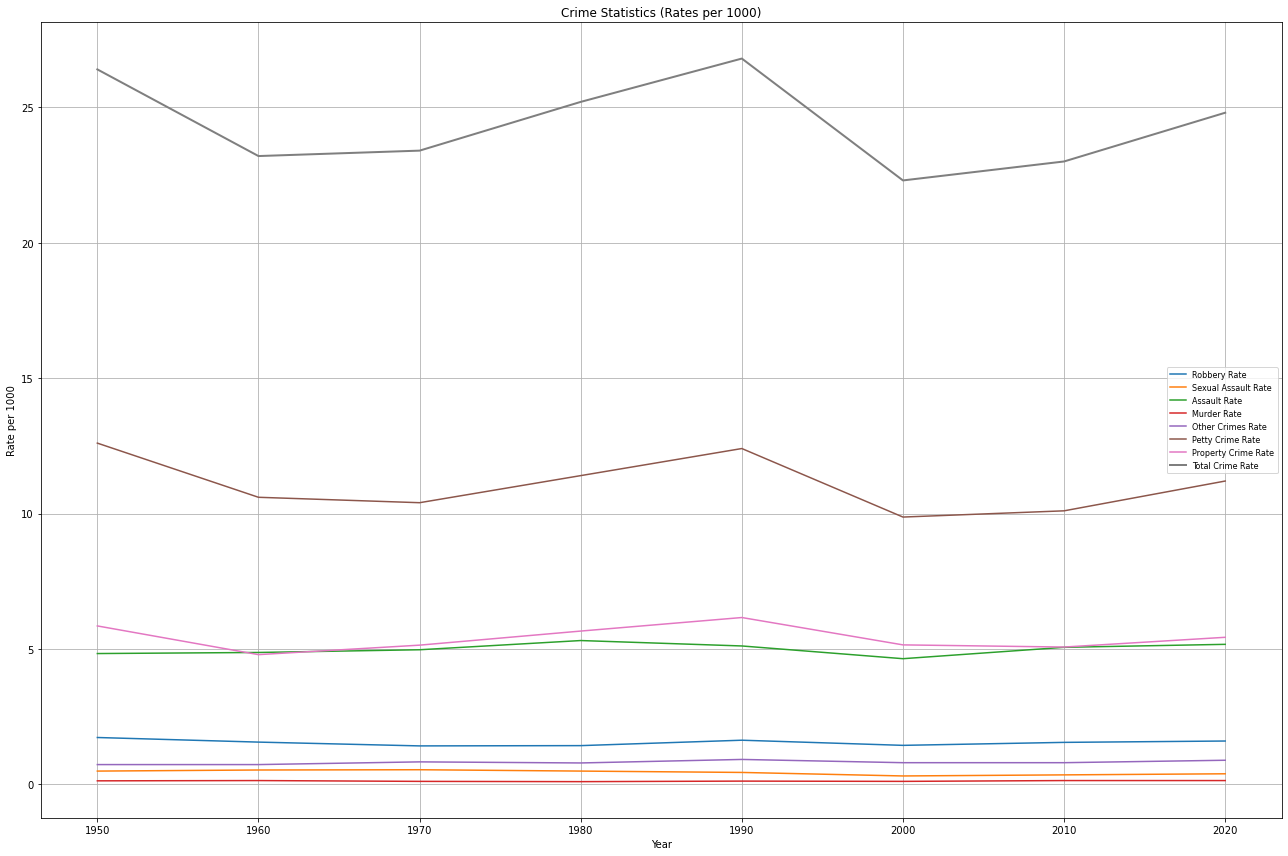

In [37]:
years = np.array([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
robbery_rate = np.array([1.73, 1.56, 1.42, 1.43, 1.63, 1.44, 1.55, 1.60])
sexual_assault_rate = np.array([0.49, 0.53, 0.54, 0.49, 0.44, 0.31, 0.35, 0.39])
assault_rate = np.array([4.83, 4.87, 4.97, 5.31, 5.11, 4.64, 5.06, 5.17])
murder_rate = np.array([0.13, 0.14, 0.11, 0.10, 0.12, 0.11, 0.14, 0.14])
other_crime_rate = np.array([0.73, 0.73, 0.83, 0.79, 0.92, 0.80, 0.80, 0.89])
petty_crime_rate = np.array([12.6, 10.6, 10.4, 11.4, 12.4, 9.87, 10.1, 11.2])
property_crime_rate = np.array([5.85, 4.79, 5.14, 5.66, 6.16, 5.15, 5.07, 5.43])
total_crime_rate = np.array([26.4, 23.2, 23.4, 25.2, 26.8, 22.3, 23.0, 24.8])

plt.figure(figsize=(18, 12))
plt.plot(years, robbery_rate, label="Robbery Rate")
plt.plot(years, sexual_assault_rate, label="Sexual Assault Rate")
plt.plot(years, assault_rate, label="Assault Rate")
plt.plot(years, murder_rate, label="Murder Rate")
plt.plot(years, other_crime_rate, label="Other Crimes Rate")
plt.plot(years, petty_crime_rate, label="Petty Crime Rate")
plt.plot(years, property_crime_rate, label="Property Crime Rate")
plt.plot(years, total_crime_rate, label="Total Crime Rate", linewidth=2)
plt.title("Crime Statistics (Rates per 1000)")
plt.xlabel("Year")
plt.ylabel("Rate per 1000")
plt.legend(fontsize=8)
plt.tight_layout()
plt.grid(True)
plt.show()

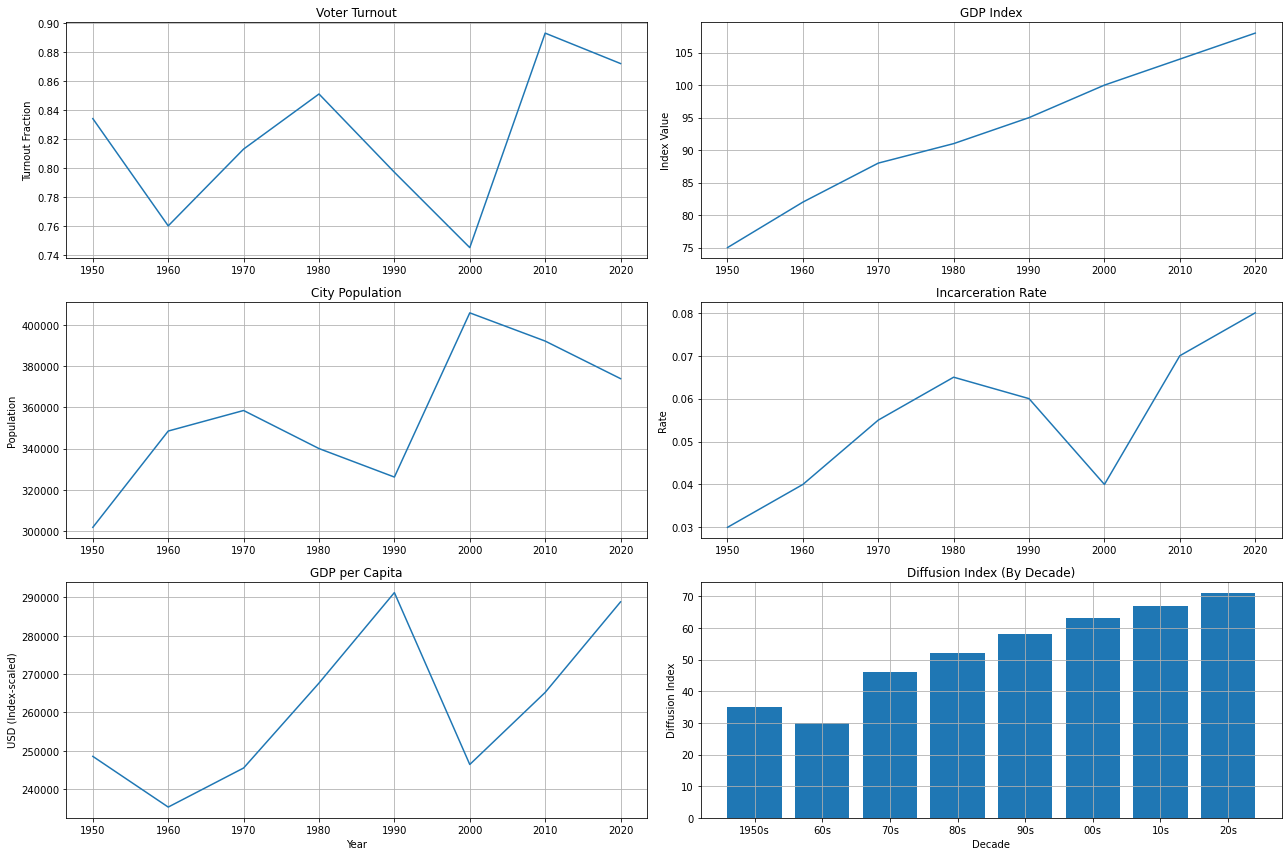

In [28]:
years = np.array([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
population = np.array([301789, 348503, 358470, 340000,
                       326179, 405835, 392151, 373921])
voter_turnout = np.array([0.834, 0.760, 0.813, 0.851,
                          0.797, 0.745, 0.893, 0.872])
incarceration_rate = np.array([0.03, 0.04, 0.055, 0.065,
                               0.06, 0.04, 0.07, 0.08])
total_crime_rate = np.array([26.4, 23.2, 23.4, 25.2,
                             26.8, 22.3, 23.0, 24.8])
gdp_index = np.array([75, 82, 88, 91, 95, 100, 104, 108])
gdp_per_capita = gdp_index * 1000 / population * 1e6
decades = ["1950s","60s","70s","80s","90s","00s","10s","20s"]
diffusion_index = [35, 30, 46, 52, 58, 63, 67, 71]

fig, axs = plt.subplots(3, 2, figsize=(18, 12))
axs[0,0].plot(years, voter_turnout)
axs[0,0].set_title("Voter Turnout")
axs[0,0].set_ylabel("Turnout Fraction")
axs[0,1].plot(years, gdp_index)
axs[0,1].set_title("GDP Index")
axs[0,1].set_ylabel("Index Value")
axs[1,0].plot(years, population)
axs[1,0].set_title("City Population")
axs[1,0].set_ylabel("Population")
axs[1,1].plot(years, incarceration_rate)
axs[1,1].set_title("Incarceration Rate")
axs[1,1].set_ylabel("Rate")
axs[2,0].plot(years, gdp_per_capita)
axs[2,0].set_title("GDP per Capita")
axs[2,0].set_xlabel("Year")
axs[2,0].set_ylabel("USD (Index-scaled)")
axs[2,1].bar(decades, diffusion_index)
axs[2,1].set_title("Diffusion Index (By Decade)")
axs[2,1].set_xlabel("Decade")
axs[2,1].set_ylabel("Diffusion Index")
for ax in axs.flat:
    ax.grid(True)
plt.tight_layout()
plt.show()

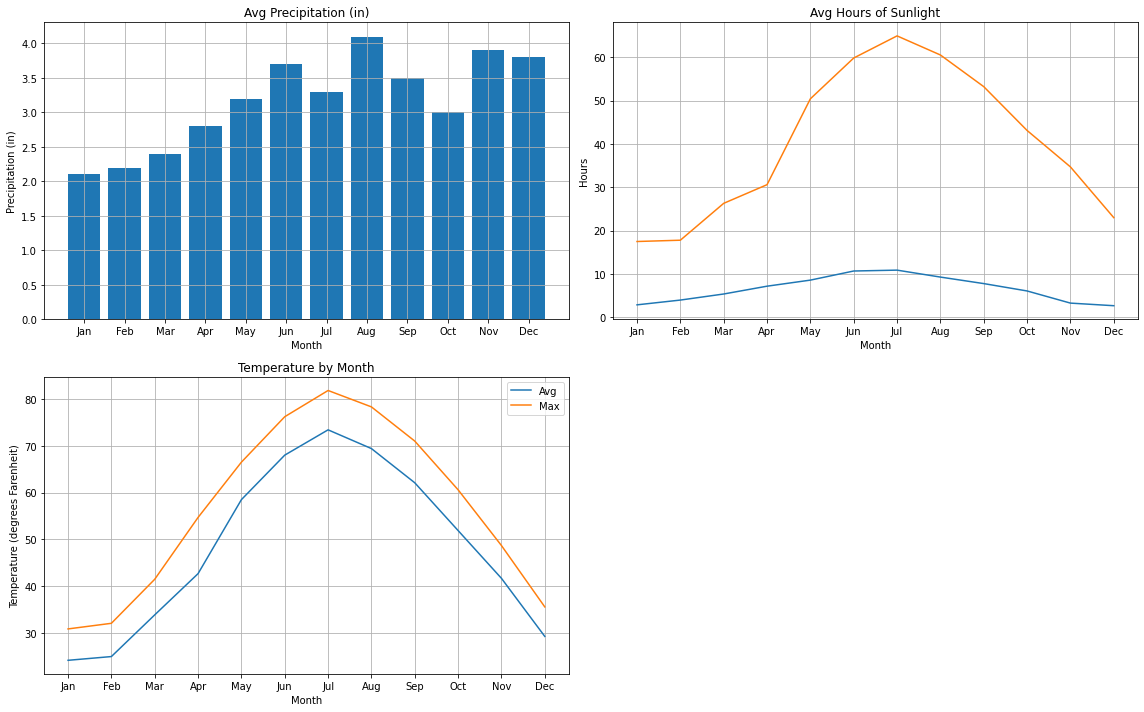

In [44]:
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
precip = [2.1,2.2,2.4,2.8,3.2,3.7,3.3,4.1,3.5,3.0,3.9,3.8]
sun = [2.9,4.0,5.4,7.2,8.6,10.7,10.9,9.3,7.8,6.1,3.3,2.7]
min_t = [17.5,17.8,26.3,30.6,50.4,59.8,64.9,60.5,53.2,43.1,34.7,23.0]
avg_t = [24.2,25.0,33.9,42.7,58.5,68.0,73.4,69.4,62.1,51.9,41.7,29.3]
max_t = [30.9,32.1,41.5,54.7,66.5,76.2,81.8,78.3,71.0,60.6,48.7,35.6]
fig, axs = plt.subplots(2,2, figsize=(16,10))
axs[0,0].bar(months, precip)
axs[0,0].set_title("Avg Precipitation (in)")
axs[0,0].set_xlabel("Month")
axs[0,0].set_ylabel("Precipitation (in)")
axs[0,1].plot(months, sun)
axs[0,1].set_title("Avg Hours of Sunlight")
axs[0,1].set_xlabel("Month")
axs[0,1].set_ylabel("Hours")
axs[0,1].plot(months, min_t, label="Min")
axs[1,0].plot(months, avg_t, label="Avg")
axs[1,0].plot(months, max_t, label="Max")
axs[1,0].legend()
axs[1,0].set_title("Temperature by Month")
axs[1,0].set_xlabel("Month")
axs[1,0].set_ylabel("Temperature (degrees Farenheit)")
axs[1,1].axis("off")
for ax in axs.flat:
    ax.grid(True)
plt.tight_layout()
plt.show()

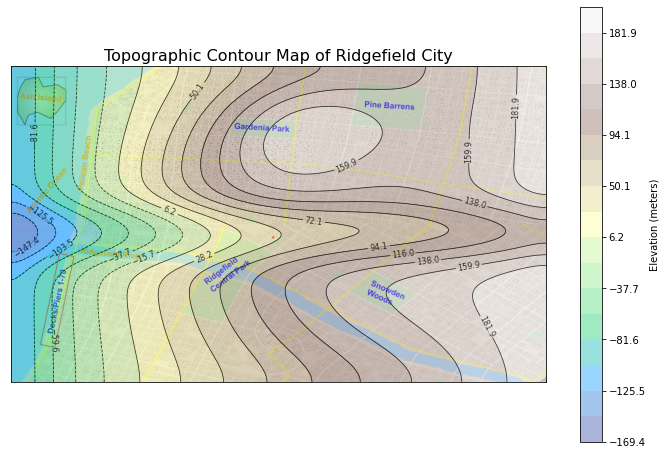

In [157]:
img_path = r"C:\Users\zplew\Downloads\Ridgefield Map.png"
img = np.array(Image.open(img_path))
h, w, _ = img.shape
Y, X = np.mgrid[0:h, 0:w]
Xn = X / w
Yn = Y / h
base = 200 * (Xn**1.7)
river_mask = (Yn > 0.45) & (Yn < 0.60)
river_valley = -80 * river_mask.astype(float)
coast_zone = np.exp(-((Xn) / 0.12))
coastal_drop = -120 * coast_zone
hill1 = 90 * np.exp(-(((Xn-0.55)/0.18)**2 + ((Yn-0.18)/0.15)**2))   
hill2 = 70 * np.exp(-(((Xn-0.45)/0.20)**2 + ((Yn-0.35)/0.18)**2))   
hill3 = 60 * np.exp(-(((Xn-0.60)/0.30)**2 + ((Yn-0.70)/0.25)**2))   
elev = base + coastal_drop + river_valley + hill1 + hill2 + hill3
elev = gaussian_filter(elev, sigma=30)

fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(img)  
levels = np.linspace(np.min(elev), np.max(elev), 18)
cs = ax.contour(
    elev,
    levels=levels,
    colors="black",
    linewidths=0.8,
    alpha=0.75
)
cf = ax.contourf(
    elev,
    levels=levels,
    cmap="terrain",
    alpha=0.40
)
ax.clabel(cs, inline=True, fontsize=8)
ax.set_title("Topographic Contour Map of Ridgefield City", fontsize=16)
ax.set_xticks([])
ax.set_yticks([])
plt.colorbar(cf, ax=ax, label="Elevation (meters)")
plt.show()

In [2]:
img_path = r"C:\Users\zplew\Downloads\Ridgefield Map.png"
city_img = np.array(Image.open(img_path))
h, w, _ = city_img.shape
Y, X = np.mgrid[0:h, 0:w]
nexrad_colors = [
    "#000000", "#202020", 
    "#0040FF", "#0070FF", "#00A0FF", "#00D0FF",
    "#00FFB0", "#00FF60", "#70FF00", "#C0FF00",
    "#FFFF00", "#FFDD00", "#FFAA00", "#FF6600",
    "#FF0000", "#D00000", "#A00000"
]
nexrad_cmap = mcolors.LinearSegmentedColormap.from_list("nexrad", nexrad_colors)

def radar_station_field(xc, yc, strength, decay, noise):
    dist = np.sqrt((X-xc)**2 + (Y-yc)**2)
    reflectivity = strength * np.exp(-(dist/decay))
    clutter = gaussian_filter(np.random.rand(h, w), sigma=30)*noise
    return reflectivity + clutter

def thunderstorm_field(xc, yc, radius, intensity, rotation, turbulence):
    dist = np.sqrt((X-xc)**2 + (Y-yc)**2)
    core = np.exp(-(dist/radius)**2)
    noise = gaussian_filter(np.random.rand(h, w), sigma=20)
    noise = (noise - noise.min()) / (noise.max() - noise.min())
    radar = (1-turbulence)*core + turbulence*noise
    return rotate(radar, rotation, reshape=False) * intensity

def multicell_field(num_cells, **p):
    total = np.zeros((h, w))
    for i in range(num_cells):
        total += thunderstorm_field(p[f"xc{i}"], p[f"yc{i}"],
                                    p[f"rad{i}"], p[f"int{i}"],
                                    p[f"rot{i}"], p[f"turb{i}"])
    return total

def hurricane_field(xc, yc, radius, eye, rotation, bands, intensity):
    dist = np.sqrt((X-xc)**2 + (Y-yc)**2)
    ang = np.arctan2(Y-yc, X-xc)
    spiral = np.sin(bands*ang + dist/40)
    core = np.exp(-(dist/radius)**1.3)
    eye_mask = np.exp(-(dist/eye)**2)
    return rotate((core - eye_mask*0.9 + 0.3*spiral) * intensity,
                  rotation, reshape=False)

def tornado_field(xc, yc, funnel, rotation, debris):
    dist = np.sqrt((X-xc)**2 + (Y-yc)**2)
    ang = np.arctan2(Y-yc, X-xc)
    hook = np.exp(-(dist/funnel)**2) * np.exp(-(ang-rotation)**2 * 4)
    debris_ball = np.exp(-(dist/(funnel*0.4))**2)
    return hook*2 + debris*debris_ball

def snow_field(intensity, turbulence):
    noise = gaussian_filter(np.random.randn(h, w), sigma=10)
    noise = (noise - noise.min())/(noise.max()-noise.min())
    return intensity*noise + 0.3*turbulence

def fog_field(density):
    fog = gaussian_filter(np.random.rand(h, w), sigma=50)
    fog = (fog - fog.min())/(fog.max()-fog.min())
    return density*fog

def heatwave_field(intensity, humidity, solar):
    base = gaussian_filter(np.random.rand(h, w), sigma=70)
    base = (base - base.min())/(base.max()-base.min())
    return intensity*base + 0.3*humidity + 0.2*solar

def wind_field(speed, direction, noise):
    ang = np.deg2rad(direction)
    U = speed*np.cos(ang) + noise*(np.random.rand(h,w)-0.5)
    V = speed*np.sin(ang) + noise*(np.random.rand(h,w)-0.5)
    return U, V

def update(weather_type, **p):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.imshow(city_img)

    if weather_type == "Radar Station":
        f = radar_station_field(**p)
        ax.imshow(f, cmap=nexrad_cmap, alpha=0.55)

    elif weather_type == "Thunderstorm":
        f = thunderstorm_field(**p)
        ax.imshow(f, cmap=nexrad_cmap, alpha=0.55)

    elif weather_type == "Multiple Cells":
        f = multicell_field(**p)
        ax.imshow(f, cmap=nexrad_cmap, alpha=0.55)

    elif weather_type == "Hurricane":
        f = hurricane_field(**p)
        ax.imshow(f, cmap=nexrad_cmap, alpha=0.55)

    elif weather_type == "Tornado":
        f = tornado_field(**p)
        ax.imshow(f, cmap="inferno", alpha=0.60)

    elif weather_type == "Snow":
        f = snow_field(**p)
        ax.imshow(f, cmap="Blues", alpha=0.45)

    elif weather_type == "Fog":
        f = fog_field(**p)
        ax.imshow(f, cmap="gray", alpha=0.35)

    elif weather_type == "Heatwave":
        f = heatwave_field(**p)
        ax.imshow(f, cmap="hot", alpha=0.45)

    elif weather_type == "Wind":
        U, V = wind_field(**p)
        step = 40
        ax.quiver(X[::step, ::step], Y[::step, ::step],
                  U[::step, ::step], V[::step, ::step],
                  color="white", scale=200)

    ax.set_xticks([]); ax.set_yticks([])
    plt.show()

def radar_widgets():
    return dict(
        xc=widgets.IntSlider(value=w//2, min=0, max=w, description="Center X"),
        yc=widgets.IntSlider(value=h//2, min=0, max=h, description="Center Y"),
        strength=widgets.FloatSlider(value=3, min=0.1, max=10, description="Strength"),
        decay=widgets.FloatSlider(value=300, min=50, max=900, description="Decay"),
        noise=widgets.FloatSlider(value=0.3, min=0, max=1, description="Noise")
    )

def thunder_widgets():
    return dict(
        xc=widgets.IntSlider(value=w//2, min=0, max=w, description="Center X"),
        yc=widgets.IntSlider(value=h//2, min=0, max=h, description="Center Y"),
        radius=widgets.IntSlider(value=200, min=50, max=800, description="Radius"),
        intensity=widgets.FloatSlider(value=1.2, min=0.1, max=4, description="Intensity"),
        rotation=widgets.FloatSlider(value=0, min=0, max=360, description="Rotation"),
        turbulence=widgets.FloatSlider(value=0.3, min=0, max=1, description="Turbulence")
    )

def multicell_widgets():
    sliders = {
        "num_cells": widgets.IntSlider(value=3, min=1, max=5, description="Number of Cells")
    }
    for i in range(5):
        sliders[f"xc{i}"] = widgets.IntSlider(value=w//2, min=0, max=w,
                                              description=f"Cell {i+1} X")
        sliders[f"yc{i}"] = widgets.IntSlider(value=h//2, min=0, max=h,
                                              description=f"Cell {i+1} Y")
        sliders[f"rad{i}"] = widgets.IntSlider(value=200, min=50, max=800,
                                               description=f"Cell {i+1} Radius")
        sliders[f"int{i}"] = widgets.FloatSlider(value=1.0, min=0, max=3,
                                                 description=f"Cell {i+1} Intensity")
        sliders[f"rot{i}"] = widgets.FloatSlider(value=0, min=0, max=360,
                                                 description=f"Cell {i+1} Rotation")
        sliders[f"turb{i}"] = widgets.FloatSlider(value=0.3, min=0, max=1,
                                                  description=f"Cell {i+1} Turbulence")
    return sliders

def hurricane_widgets():
    return dict(
        xc=widgets.IntSlider(value=w//2, min=0, max=w, description="Center X"),
        yc=widgets.IntSlider(value=h//2, min=0, max=h, description="Center Y"),
        radius=widgets.IntSlider(value=350, min=100, max=900, description="Storm Radius"),
        eye=widgets.IntSlider(value=60, min=20, max=200, description="Eye Size"),
        rotation=widgets.FloatSlider(value=0, min=0, max=360, description="Rotation"),
        bands=widgets.FloatSlider(value=8, min=1, max=20, description="Band Count"),
        intensity=widgets.FloatSlider(value=1.5, min=0.2, max=4, description="Intensity")
    )

def tornado_widgets():
    return dict(
        xc=widgets.IntSlider(value=w//2, min=0, max=w, description="Center X"),
        yc=widgets.IntSlider(value=h//2, min=0, max=h, description="Center Y"),
        funnel=widgets.IntSlider(value=120, min=40, max=300, description="Funnel Size"),
        rotation=widgets.FloatSlider(value=0, min=-3.14, max=3.14, description="Rotation Angle"),
        debris=widgets.FloatSlider(value=1.0, min=0, max=3, description="Debris Intensity")
    )

def snow_widgets():
    return dict(
        intensity=widgets.FloatSlider(value=1.0, min=0, max=3, description="Snow Intensity"),
        turbulence=widgets.FloatSlider(value=0.3, min=0, max=1, description="Turbulence")
    )

def fog_widgets():
    return dict(
        density=widgets.FloatSlider(value=0.5, min=0, max=2, description="Fog Density")
    )

def heat_widgets():
    return dict(
        intensity=widgets.FloatSlider(value=1.0, min=0, max=4, description="Heat Intensity"),
        humidity=widgets.FloatSlider(value=0.5, min=0, max=2, description="Humidity"),
        solar=widgets.FloatSlider(value=1.0, min=0, max=3, description="Solar Load")
    )

def wind_widgets():
    return dict(
        speed=widgets.FloatSlider(value=4, min=0, max=20, description="Wind Speed"),
        direction=widgets.FloatSlider(value=0, min=0, max=360, description="Direction"),
        noise=widgets.FloatSlider(value=0.3, min=0, max=2, description="Turbulence")
    )

widget_map = {
    "Radar Station": radar_widgets,
    "Thunderstorm": thunder_widgets,
    "Multiple Cells": multicell_widgets,
    "Hurricane": hurricane_widgets,
    "Tornado": tornado_widgets,
    "Snow": snow_widgets,
    "Fog": fog_widgets,
    "Heatwave": heat_widgets,
    "Wind": wind_widgets,
    "Clear": lambda: {},
}

weather_dropdown = widgets.Dropdown(
    options=list(widget_map.keys()),
    description="Weather:"
)

output_box = widgets.Output()

def change_weather(change):
    output_box.clear_output()
    typ = change["new"]
    sliders = widget_map[typ]()

    ui = interactive_output(lambda **kw: update(typ, **kw), sliders)
    with output_box:
        display(VBox([*(sliders.values()), ui]))

weather_dropdown.observe(change_weather, names="value")
display(VBox([weather_dropdown, output_box]))

change_weather({"new": "Radar Station"})

### City Leadership Hierarchy Structures

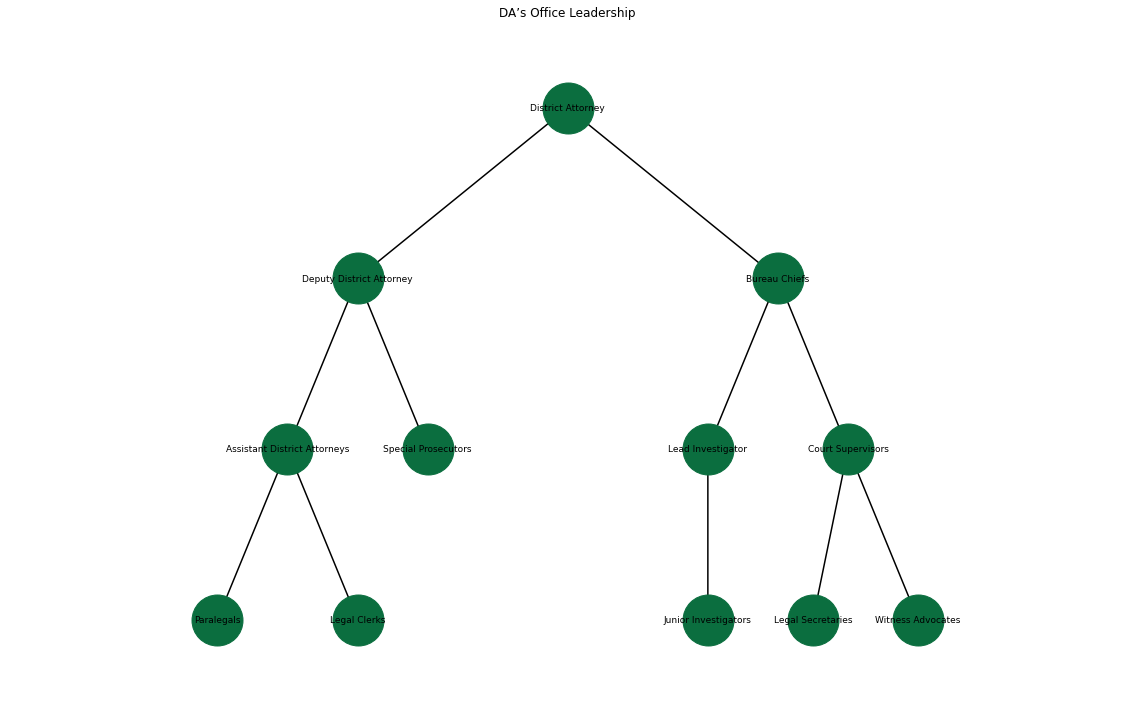

In [46]:
G = nx.DiGraph()

nodes = [
    "District Attorney",
    "Deputy District Attorney", "Bureau Chiefs",
    "Assistant District Attorneys", "Special Prosecutors",
    "Lead Investigator", "Court Supervisors",
    "Paralegals", "Legal Clerks",
    "Junior Investigators", "Legal Secretaries", "Witness Advocates"
]
edges = [
    ("District Attorney", "Deputy District Attorney"),
    ("District Attorney", "Bureau Chiefs"),
    ("Deputy District Attorney", "Assistant District Attorneys"),
    ("Deputy District Attorney", "Special Prosecutors"),
    ("Assistant District Attorneys", "Paralegals"),
    ("Assistant District Attorneys", "Legal Clerks"),
    ("Bureau Chiefs", "Lead Investigator"),
    ("Bureau Chiefs", "Court Supervisors"),
    ("Lead Investigator", "Junior Investigators"),
    ("Court Supervisors", "Legal Secretaries"),
    ("Court Supervisors", "Witness Advocates")
]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

pos = {
    "District Attorney": (0,5),
    "Deputy District Attorney": (-3,4),
    "Bureau Chiefs": (3,4),
    "Assistant District Attorneys": (-4,3),
    "Special Prosecutors": (-2,3),
    "Lead Investigator": (2,3),
    "Court Supervisors": (4,3),
    "Paralegals": (-5,2),
    "Legal Clerks": (-3,2),
    "Junior Investigators": (2,2),
    "Legal Secretaries": (3.5,2),
    "Witness Advocates": (5,2)
}

fig, ax = plt.subplots(figsize=(16,10))
ax.set_facecolor("#1e1e1e")
nx.draw_networkx_edges(G, pos, edge_color="black", width=1.5, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=9, font_color="black", ax=ax)
nx.draw_networkx_nodes(G, pos, node_color="#0b6e3f", node_size=2600, node_shape="o", ax=ax)
ax.text(-6.8,3.8,"DA’s Office: Leadership\nHierarchy",
        fontsize=18, color="white", rotation=55, ha="center", va="center")
ax.set_xlim(-8,8)
ax.set_ylim(1.5,5.5)
ax.axis("off")
plt.title("DA’s Office Leadership")
plt.tight_layout()
plt.show()

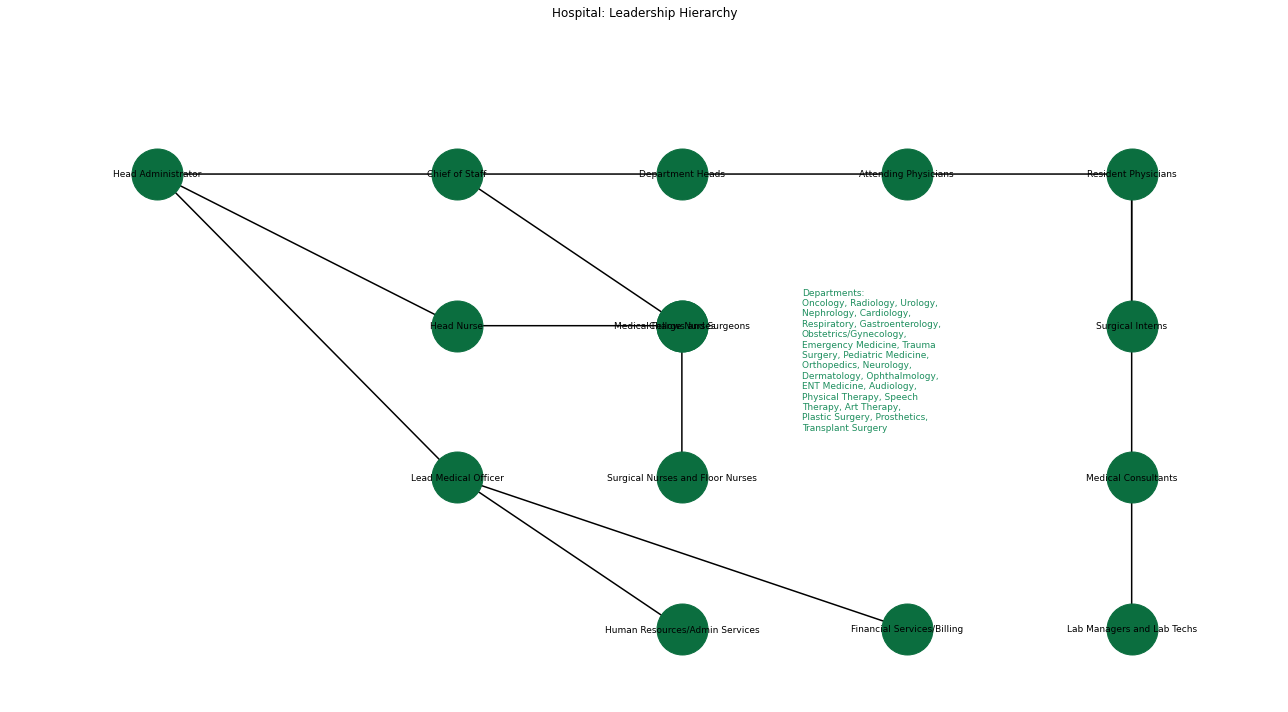

In [50]:
G = nx.DiGraph()

nodes = [
    "Head Administrator",
    "Chief of Staff", "Head Nurse", "Lead Medical Officer",
    "Department Heads", "Medical Fellows and Surgeons",
    "Charge Nurses", "Surgical Nurses and Floor Nurses",
    "Attending Physicians", "Resident Physicians",
    "Surgical Interns", "Medical Consultants",
    "Lab Managers and Lab Techs",
    "Human Resources/Admin Services", "Financial Services/Billing"
]
edges = [
    ("Head Administrator","Chief of Staff"),
    ("Head Administrator","Head Nurse"),
    ("Head Administrator","Lead Medical Officer"),
    ("Chief of Staff","Department Heads"),
    ("Chief of Staff","Medical Fellows and Surgeons"),
    ("Department Heads","Attending Physicians"),
    ("Attending Physicians","Resident Physicians"),
    ("Resident Physicians","Surgical Interns"),
    ("Resident Physicians","Medical Consultants"),
    ("Medical Consultants","Lab Managers and Lab Techs"),
    ("Head Nurse","Charge Nurses"),
    ("Charge Nurses","Surgical Nurses and Floor Nurses"),
    ("Lead Medical Officer","Human Resources/Admin Services"),
    ("Lead Medical Officer","Financial Services/Billing")
]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

pos = {
    "Head Administrator": (-6,4),
    "Chief of Staff": (-2,4),
    "Department Heads": (1,4),
    "Attending Physicians": (4,4),
    "Resident Physicians": (7,4),
    "Medical Fellows and Surgeons": (1,3),
    "Surgical Interns": (7,3),
    "Head Nurse": (-2,3),
    "Charge Nurses": (1,3),
    "Surgical Nurses and Floor Nurses": (1,2),
    "Lead Medical Officer": (-2,2),
    "Human Resources/Admin Services": (1,1),
    "Financial Services/Billing": (4,1),
    "Medical Consultants": (7,2),
    "Lab Managers and Lab Techs": (7,1)
}

fig, ax = plt.subplots(figsize=(18,10))
ax.set_facecolor("#1e1e1e")
nx.draw_networkx_edges(G, pos, edge_color="black", width=1.5, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=9, font_color="black", ax=ax)
nx.draw_networkx_nodes(G, pos, node_color="#0b6e3f", node_size=2600, node_shape="o", ax=ax)
note_text = (
    "Departments:\n"
    "Oncology, Radiology, Urology,\n"
    "Nephrology, Cardiology,\n"
    "Respiratory, Gastroenterology,\n"
    "Obstetrics/Gynecology,\n"
    "Emergency Medicine, Trauma\n"
    "Surgery, Pediatric Medicine,\n"
    "Orthopedics, Neurology,\n"
    "Dermatology, Ophthalmology,\n"
    "ENT Medicine, Audiology,\n"
    "Physical Therapy, Speech\n"
    "Therapy, Art Therapy,\n"
    "Plastic Surgery, Prosthetics,\n"
    "Transplant Surgery"
)
ax.text(
    2.6, 3.25,
    note_text,
    fontsize=9,
    color="#1f8f5f",
    ha="left",
    va="top"
)
ax.set_xlim(-8,9)
ax.set_ylim(0.5,5)
ax.axis("off")
plt.title("Hospital: Leadership Hierarchy")
plt.tight_layout()
plt.show()

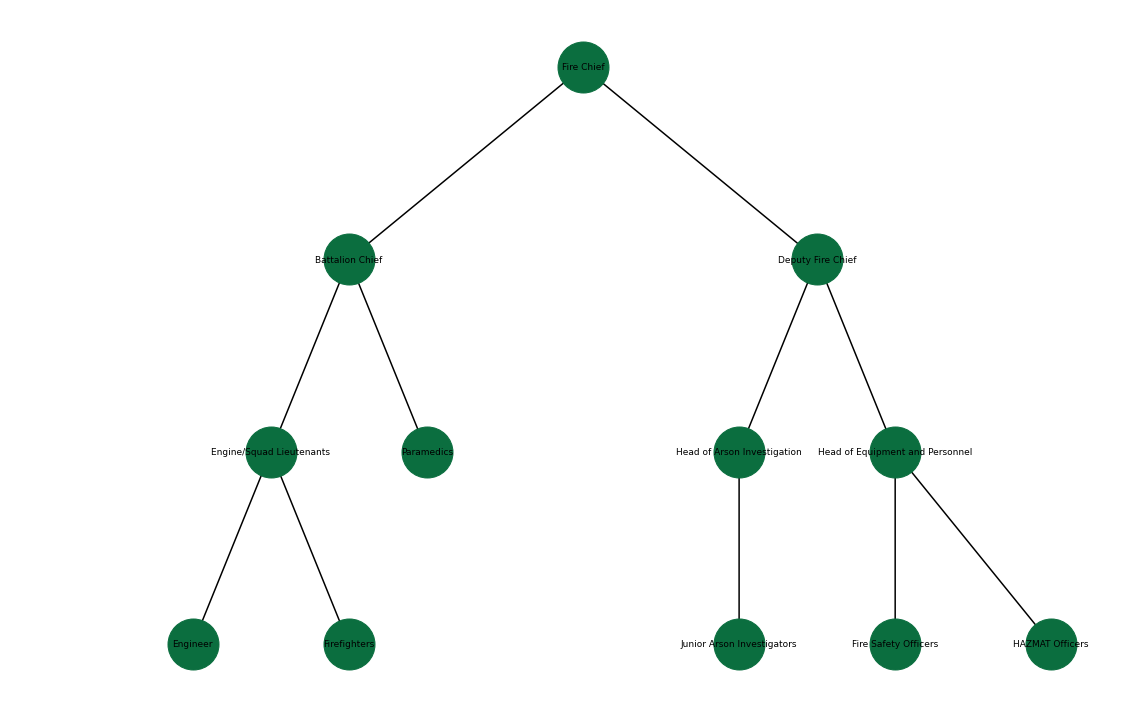

In [48]:
G = nx.DiGraph()

nodes = [
    "Fire Chief",
    "Battalion Chief", "Deputy Fire Chief",
    "Engine/Squad Lieutenants", "Paramedics",
    "Head of Arson Investigation", "Head of Equipment and Personnel",
    "Engineer", "Firefighters",
    "Junior Arson Investigators", "Fire Safety Officers", "HAZMAT Officers"
]
edges = [
    ("Fire Chief","Battalion Chief"),
    ("Fire Chief","Deputy Fire Chief"),
    ("Battalion Chief","Engine/Squad Lieutenants"),
    ("Battalion Chief","Paramedics"),
    ("Engine/Squad Lieutenants","Engineer"),
    ("Engine/Squad Lieutenants","Firefighters"),
    ("Deputy Fire Chief","Head of Arson Investigation"),
    ("Deputy Fire Chief","Head of Equipment and Personnel"),
    ("Head of Arson Investigation","Junior Arson Investigators"),
    ("Head of Equipment and Personnel","Fire Safety Officers"),
    ("Head of Equipment and Personnel","HAZMAT Officers")
]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

pos = {
    "Fire Chief": (0,5),
    "Battalion Chief": (-3,4),
    "Deputy Fire Chief": (3,4),
    "Engine/Squad Lieutenants": (-4,3),
    "Paramedics": (-2,3),
    "Head of Arson Investigation": (2,3),
    "Head of Equipment and Personnel": (4,3),
    "Engineer": (-5,2),
    "Firefighters": (-3,2),
    "Junior Arson Investigators": (2,2),
    "Fire Safety Officers": (4,2),
    "HAZMAT Officers": (6,2)
}

fig, ax = plt.subplots(figsize=(16,10))
ax.set_facecolor("#1e1e1e")
nx.draw_networkx_edges(G, pos, edge_color="black", width=1.5, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=9, font_color="black", ax=ax)
nx.draw_networkx_nodes(G, pos, node_color="#0b6e3f", node_size=2600, node_shape="o", ax=ax)
ax.text(-6.5,3.7,"Fire Department: Ranks",
        fontsize=18, color="white", rotation=55, ha="center", va="center")

ax.axis("off")
plt.tight_layout()
plt.show()


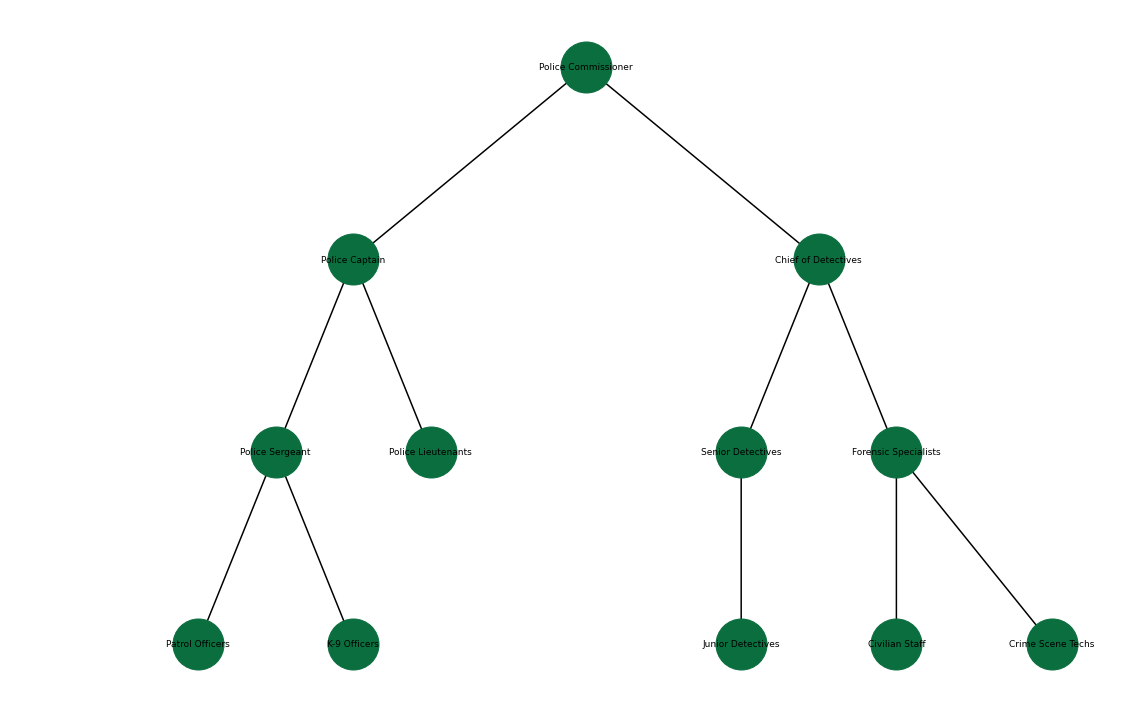

In [49]:
G = nx.DiGraph()

nodes = [
    "Police Commissioner",
    "Police Captain", "Chief of Detectives",
    "Police Sergeant", "Police Lieutenants",
    "Senior Detectives", "Forensic Specialists",
    "Patrol Officers", "K-9 Officers",
    "Junior Detectives", "Civilian Staff", "Crime Scene Techs"
]
edges = [
    ("Police Commissioner","Police Captain"),
    ("Police Commissioner","Chief of Detectives"),
    ("Police Captain","Police Sergeant"),
    ("Police Captain","Police Lieutenants"),
    ("Police Sergeant","Patrol Officers"),
    ("Police Sergeant","K-9 Officers"),
    ("Chief of Detectives","Senior Detectives"),
    ("Chief of Detectives","Forensic Specialists"),
    ("Senior Detectives","Junior Detectives"),
    ("Forensic Specialists","Civilian Staff"),
    ("Forensic Specialists","Crime Scene Techs")
]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

pos = {
    "Police Commissioner": (0,5),
    "Police Captain": (-3,4),
    "Chief of Detectives": (3,4),
    "Police Sergeant": (-4,3),
    "Police Lieutenants": (-2,3),
    "Senior Detectives": (2,3),
    "Forensic Specialists": (4,3),
    "Patrol Officers": (-5,2),
    "K-9 Officers": (-3,2),
    "Junior Detectives": (2,2),
    "Civilian Staff": (4,2),
    "Crime Scene Techs": (6,2)
}

fig, ax = plt.subplots(figsize=(16,10))
ax.set_facecolor("#1e1e1e")
nx.draw_networkx_edges(G, pos, edge_color="black", width=1.5, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=9, font_color="black", ax=ax)
nx.draw_networkx_nodes(G, pos, node_color="#0b6e3f", node_size=2600, node_shape="o", ax=ax)
ax.text(-6.5,3.7,"Police Department: Ranks",
        fontsize=18, color="white", rotation=55, ha="center", va="center")
ax.axis("off")
plt.tight_layout()
plt.show()

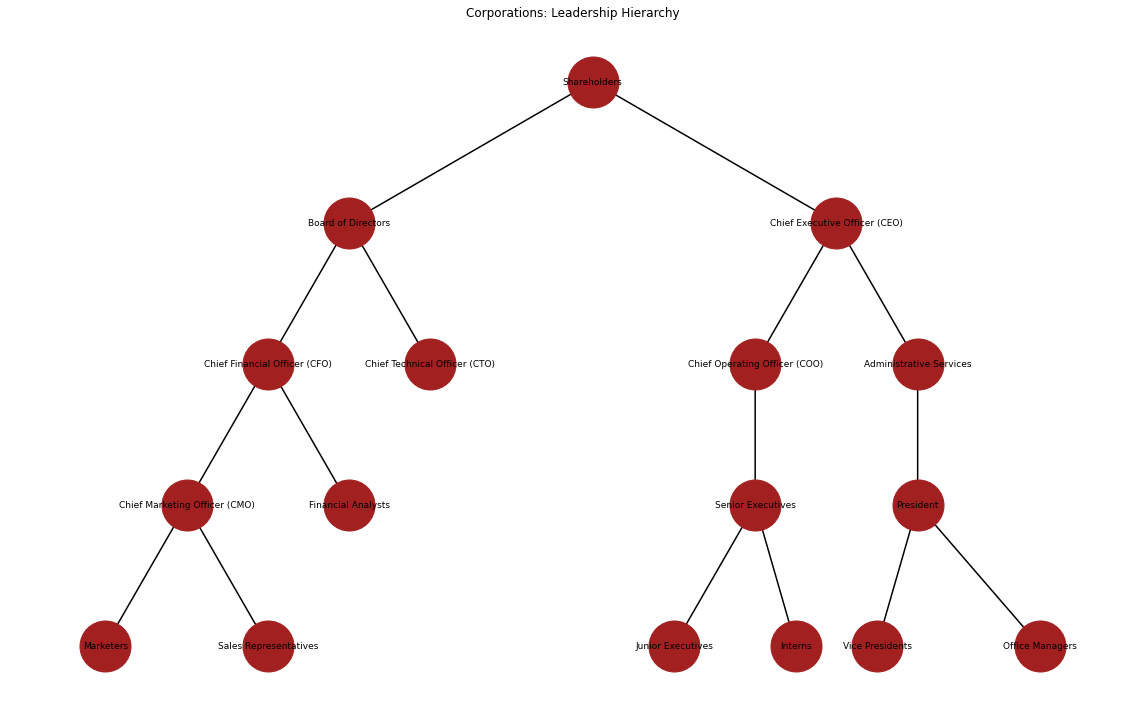

In [52]:
G = nx.DiGraph()

nodes = [
    "Shareholders",
    "Board of Directors", "Chief Executive Officer (CEO)",
    "Chief Financial Officer (CFO)", "Chief Technical Officer (CTO)",
    "Chief Operating Officer (COO)", "Administrative Services",
    "Chief Marketing Officer (CMO)", "Financial Analysts",
    "Senior Executives", "President",
    "Marketers", "Sales Representatives",
    "Junior Executives", "Interns",
    "Vice Presidents", "Office Managers"
]
edges = [
    ("Shareholders","Board of Directors"),
    ("Shareholders","Chief Executive Officer (CEO)"),
    ("Board of Directors","Chief Financial Officer (CFO)"),
    ("Board of Directors","Chief Technical Officer (CTO)"),
    ("Chief Financial Officer (CFO)","Chief Marketing Officer (CMO)"),
    ("Chief Financial Officer (CFO)","Financial Analysts"),
    ("Chief Marketing Officer (CMO)","Marketers"),
    ("Chief Marketing Officer (CMO)","Sales Representatives"),
    ("Chief Executive Officer (CEO)","Chief Operating Officer (COO)"),
    ("Chief Executive Officer (CEO)","Administrative Services"),
    ("Chief Operating Officer (COO)","Senior Executives"),
    ("Senior Executives","Junior Executives"),
    ("Senior Executives","Interns"),
    ("Administrative Services","President"),
    ("President","Vice Presidents"),
    ("President","Office Managers")
]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

pos = {
    "Shareholders": (0,6),
    "Board of Directors": (-3,5),
    "Chief Executive Officer (CEO)": (3,5),
    "Chief Financial Officer (CFO)": (-4,4),
    "Chief Technical Officer (CTO)": (-2,4),
    "Chief Operating Officer (COO)": (2,4),
    "Administrative Services": (4,4),
    "Chief Marketing Officer (CMO)": (-5,3),
    "Financial Analysts": (-3,3),
    "Senior Executives": (2,3),
    "President": (4,3),
    "Marketers": (-6,2),
    "Sales Representatives": (-4,2),
    "Junior Executives": (1,2),
    "Interns": (2.5,2),
    "Vice Presidents": (3.5,2),
    "Office Managers": (5.5,2)
}

fig, ax = plt.subplots(figsize=(16,10))
ax.set_facecolor("#1e1e1e")
nx.draw_networkx_edges(G, pos, edge_color="black", width=1.5, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=9, font_color="black", ax=ax)
nx.draw_networkx_nodes(G, pos, node_color="#a32020", node_size=2600, node_shape="o", ax=ax)
ax.axis("off")
plt.title("Corporations: Leadership Hierarchy")
plt.tight_layout()
plt.show()

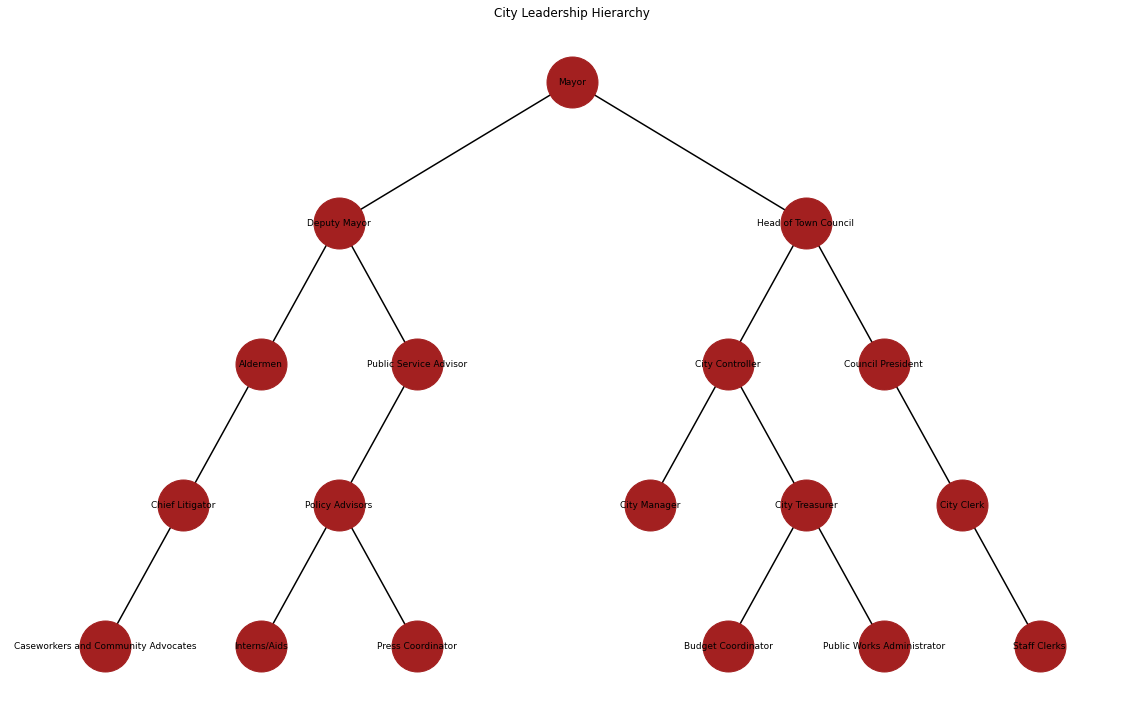

In [53]:
G = nx.DiGraph()

nodes = [
    "Mayor",
    "Deputy Mayor", "Head of Town Council",
    "Aldermen", "Public Service Advisor",
    "City Controller", "Council President",
    "Chief Litigator", "Policy Advisors",
    "City Manager", "City Treasurer", "City Clerk",
    "Caseworkers and Community Advocates",
    "Interns/Aids", "Press Coordinator",
    "Budget Coordinator", "Public Works Administrator",
    "Staff Clerks"
]
edges = [
    ("Mayor","Deputy Mayor"),
    ("Mayor","Head of Town Council"),
    ("Deputy Mayor","Aldermen"),
    ("Deputy Mayor","Public Service Advisor"),
    ("Aldermen","Chief Litigator"),
    ("Public Service Advisor","Policy Advisors"),
    ("Chief Litigator","Caseworkers and Community Advocates"),
    ("Policy Advisors","Interns/Aids"),
    ("Policy Advisors","Press Coordinator"),
    ("Head of Town Council","City Controller"),
    ("Head of Town Council","Council President"),
    ("City Controller","City Manager"),
    ("City Controller","City Treasurer"),
    ("City Treasurer","Budget Coordinator"),
    ("City Treasurer","Public Works Administrator"),
    ("Council President","City Clerk"),
    ("City Clerk","Staff Clerks")
]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

pos = {
    "Mayor": (0,6),
    "Deputy Mayor": (-3,5),
    "Head of Town Council": (3,5),
    "Aldermen": (-4,4),
    "Public Service Advisor": (-2,4),
    "City Controller": (2,4),
    "Council President": (4,4),
    "Chief Litigator": (-5,3),
    "Policy Advisors": (-3,3),
    "City Manager": (1,3),
    "City Treasurer": (3,3),
    "City Clerk": (5,3),
    "Caseworkers and Community Advocates": (-6,2),
    "Interns/Aids": (-4,2),
    "Press Coordinator": (-2,2),
    "Budget Coordinator": (2,2),
    "Public Works Administrator": (4,2),
    "Staff Clerks": (6,2)
}

fig, ax = plt.subplots(figsize=(16,10))
ax.set_facecolor("#1e1e1e")
nx.draw_networkx_edges(G, pos, edge_color="black", width=1.5, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=9, font_color="black", ax=ax)
nx.draw_networkx_nodes(G, pos, node_color="#a32020", node_size=2600, node_shape="o", ax=ax)
ax.axis("off")
plt.title("City Leadership Hierarchy")
plt.tight_layout()
plt.show()

In [3]:
years = np.array([
    1955, 1960, 1965, 1970, 1975,
    1980, 1985, 1990, 1995, 2000,
    2005, 2010, 2015, 2020, 2025
])

stock_data = {
    "Spaulding Enterprises": np.array([
        845.07, 878.38, 865.38, 888.89, 882.35,
        867.47, 732.95, 560.44, 611.70, 663.04,
        716.67, 740.74, 769.23, 841.58, 904.76
    ]),
    "JET Industries": np.array([
        728.57, 748.30, 746.75, 681.25, 718.56,
        790.96, 835.16, 881.72, 807.29, 719.58,
        543.59, 713.57, 781.40, 884.62, 904.55
    ]),
    "King Publishing Co": np.array([
        960.40, 962.96, 958.33, 838.46, 958.33,
        1053.33, 1018.07, 1093.75, 1040.46, 1130.95,
        975.61, 878.98, 643.75, 830.60, 968.42
    ]),
    "Duquenesque Global": np.array([
        1162.50, 1063.83, 1045.45, 1053.85, 1013.51,
        1006.33, 970.41, 896.55, 823.53, 677.78,
        613.64, 653.85, 739.13, 634.73, 606.25
    ]),
    "Stone Technologies": np.array([
        1433.33, 1081.08, 791.67, 697.67, 900.00,
        1160.71, 1114.75, 1016.95, 1036.50, 1046.36,
        911.39, 818.18, 889.53, 918.75, 945.58
    ])
}

def plot_stock(company):
    plt.figure(figsize=(8, 4.5))
    plt.plot(
        years,
        stock_data[company],
        marker="o",
        linewidth=2
    )
    plt.title(f"{company}: Stock Value\n(Voting Shares = 100)")
    plt.xlabel("Year")
    plt.ylabel("Share Price (USD)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

interact(
    plot_stock,
    company=Dropdown(
        options=list(stock_data.keys()),
        value="Spaulding Enterprises",
        description="Company:"
    )
);

interactive(children=(Dropdown(description='Company:', options=('Spaulding Enterprises', 'JET Industries', 'Ki…